# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

# Set style visualisasi
sns.set_style("whitegrid")

# Load Dataset

In [3]:
!gdown 1BWIA-ieypU4TU05G_GI1EPSMnJrs_eMf

Downloading...
From (original): https://drive.google.com/uc?id=1BWIA-ieypU4TU05G_GI1EPSMnJrs_eMf
From (redirected): https://drive.google.com/uc?id=1BWIA-ieypU4TU05G_GI1EPSMnJrs_eMf&confirm=t&uuid=ce446bca-f829-49d8-a72d-3ab2dc87c040
To: /content/loan_data_2007_2014.csv
100% 240M/240M [00:01<00:00, 125MB/s]


In [4]:
df = pd.read_csv('loan_data_2007_2014.csv')

# Data Understanding

## Basic Understanding

In [5]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Informasi Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

**Informasi Data:**

- **Ukuran dataset:** terdiri dari 466.285 baris dan 75 kolom
- **Tipe data:** Numerik (float64, int64) terdiri dari 53 kolom dan Kategorikal / Objek (object) terdiri dari 22 kolom

**Masalah:**
- **Kolom yang benar-benar kosong (semua nilai null):** annual_inc_joint, dti_joint, verification_status_joint, open_acc_6m, open_il_6m, open_il_12m, open_il_24m dsb. -> kolom-kolom tersebut dapat di hapus karena tidak mengandung informasi
- **Kolom dengan Banyak Nilai Hilang Parsial** dimana terdapat beberapa kolom yang memiliki nilai kosong >50% akan dipertimbangkan untuk di hapus
- **Belum terdapat kolom target** -> akan dibuat pada tahap selanjutnya

### Deskripsi Data

In [7]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Berdasarkan deskripsi data tersebut terdapat banyak data yang memiliki nilai kosong dan tidak relevan untuk dianalisis seperti unnamed:0 dsb.

### Checking Missing Value

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0


In [9]:
# Hitung jumlah dan persentase missing value per kolom
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Gabungkan menjadi DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent (%)': missing_percent
})

# Filter kolom yang memiliki missing value > 0%, dan urutkan
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df = missing_df.sort_values(by='Percent (%)', ascending=False)

# Tampilkan hasilnya
print(missing_df)

                             Missing Values  Percent (%)
inq_fi                               466285   100.000000
open_rv_24m                          466285   100.000000
max_bal_bc                           466285   100.000000
all_util                             466285   100.000000
inq_last_12m                         466285   100.000000
annual_inc_joint                     466285   100.000000
verification_status_joint            466285   100.000000
dti_joint                            466285   100.000000
total_cu_tl                          466285   100.000000
il_util                              466285   100.000000
mths_since_rcnt_il                   466285   100.000000
total_bal_il                         466285   100.000000
open_il_24m                          466285   100.000000
open_il_12m                          466285   100.000000
open_il_6m                           466285   100.000000
open_acc_6m                          466285   100.000000
open_rv_12m                    

Terlihat banyak kolom dengan persentase missing values yang besar, yaitu
- kolom dengan 100% missing value (17 kolom)
- kolom dengan missing value ≥40%, tetapi tidak 100%

Maka masalah tersebut perlu diatasi dengan mendrop kolom tidak relevan dan juga imputasi jika diperlukan

### Checking Duplicate Values

In [10]:
# Mengecek jumlah baris duplikat
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")

Jumlah baris duplikat: 0


Pada data tidak terdapat data duplikat sehingga tidak perlu dilakukan penghapusan baris duplikat

# Data Preparation (Tahap 1)

Langkah-langkah Data Preparation yang Akan Dilakukan:

1. Menentukan Kolom Target
2. Menghapus Fitur yang Tidak Relevan
3. Menangani Nilai yang Hilang
4. Mengubah Tipe Data
5. Melakukan Feature Engineering
6. Membagi Data Menjadi Train dan Test
7. Menangani Ketidakseimbangan Data
8. Melakukan Standarisasi

Penanganan data yang tidak seimbang (imbalanced data) sebaiknya dilakukan setelah proses split train-test untuk menghindari data leakage. Jika oversampling (seperti SMOTE) dilakukan sebelum pemisahan data, ada kemungkinan data sintetis yang dihasilkan dari data test ikut masuk ke data train. Hal ini membuat model belajar dari informasi yang seharusnya hanya tersedia saat pengujian, sehingga performa model menjadi tidak objektif atau bias.

## 1-Membuat Kolom Target

In [11]:
df["loan_status"].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


In [12]:
def classify_credit_risk(status):
    high_risk_status = ['Charged Off', 'Default', 'Late (31-120 days)',
                        'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']

    low_risk_status = ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid','In Grace Period']

    if status in high_risk_status:
        return "Bad"  # High Risk → Bad
    elif status in low_risk_status:
        return "Good"  # Low Risk → Good
    else:
        return np.nan  # Hapus nanti

df['credit_risk'] = df['loan_status'].apply(classify_credit_risk)

In [13]:
df['credit_risk'].value_counts()

,count
credit_risk,
Good,414099
Bad,52186


In [14]:
df['credit_risk'].value_counts(normalize=True) * 100

,proportion
credit_risk,
Good,88.808132
Bad,11.191868


Terlihat bahwa kolom targetnya imbalanced, maka ini akan menjadi pertimbangan untuk dilakukan SMOTE pada tahap selanjutnya.

## 2-Drop Fitur Tidak Relevan

In [15]:
# Cek nilai unik untuk kolom kategorik (object)
print("=== Nilai Unik pada Variabel Kategorik ===")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()}")

# Pisahkan baris
print("\n" + "="*50 + "\n")

# Cek nilai unik untuk kolom numerik (int64, float64)
print("=== Nilai Unik pada Variabel Numerik ===")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    print(f"{col}: {df[col].nunique()}")

=== Nilai Unik pada Variabel Kategorik ===
term: 2
grade: 7
sub_grade: 35
emp_title: 205475
emp_length: 11
home_ownership: 6
verification_status: 3
issue_d: 91
loan_status: 9
pymnt_plan: 2
url: 466285
desc: 124435
purpose: 14
title: 63098
zip_code: 888
addr_state: 50
earliest_cr_line: 664
initial_list_status: 2
last_pymnt_d: 98
next_pymnt_d: 100
last_credit_pull_d: 103
application_type: 1
credit_risk: 2


=== Nilai Unik pada Variabel Numerik ===
Unnamed: 0: 466285
id: 466285
member_id: 466285
loan_amnt: 1352
funded_amnt: 1354
funded_amnt_inv: 9854
int_rate: 506
installment: 55622
annual_inc: 31901
dti: 3997
delinq_2yrs: 24
inq_last_6mths: 28
mths_since_last_delinq: 145
mths_since_last_record: 123
open_acc: 62
pub_rec: 26
revol_bal: 58142
revol_util: 1269
total_acc: 112
out_prncp: 135665
out_prncp_inv: 141189
total_pymnt: 351609
total_pymnt_inv: 347659
total_rec_prncp: 172713
total_rec_int: 270249
total_rec_late_fee: 5808
recoveries: 22773
collection_recovery_fee: 20275
last_pymnt_amnt:

In [16]:
# Menemukan kolom dengan hanya 1 nilai unik (uninformative)
uninformative_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Kolom dengan hanya 1 nilai unik:")
print(uninformative_cols)

Kolom dengan hanya 1 nilai unik:
['policy_code', 'application_type']


---

 **Kolom yang Sebaiknya Dihapus (Irrelevant/Redundant Features)**

| Kolom                                                                                                                                                                                                                                                                                 | Alasan Penghapusan                                                                                   |
| ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------- |
| `Unnamed: 0`                                                                                                                                                                                                                                                                          | Hanya indeks tambahan dari CSV                                                                       |
| `id`, `member_id`                                                                                                                                                                                                                                                                     | ID unik, tidak memiliki kontribusi prediktif                                                         |
| `url`                                                                                                                                                                                                                                                                                 | Hanya link ke halaman web pinjaman                                                                   |
| `desc`                                                                                                                                                                                                                                                                                | Teks panjang, tidak distandarkan, sulit digunakan tanpa NLP                                          |
| `emp_title`, `title`                                                                                                                                                                                                                                                                  | Teks bebas, sangat bervariasi dan sulit dikelompokkan tanpa preprocessing NLP                        |
| `zip_code`                                                                                                                                                                                                                                                                            | Terlalu granular, tidak umum digunakan dalam model kredit                                            |
| `policy_code`                                                                                                                                                                                                                                                                         | Hanya memiliki satu nilai → tidak memberikan variasi                                                 |
| `application_type`                                                                                                                                                                                                                                                                    | Nilainya hanya satu (misalnya "INDIVIDUAL") → tidak informatif                                       |
| `loan_status`                                                                                                                                                                                                                                                                         | Sudah dipakai untuk membuat kolom `credit_risk` → harus dihapus agar tidak terjadi *data leakage*    |

In [17]:
cols_to_drop = [
    'Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'emp_title', 'title', 'zip_code',
    'policy_code', 'application_type', 'loan_status',
]

df.drop(columns=cols_to_drop, inplace=True)

## 3-Handle Missing Value

#### **Drop kolom yang missing value 100% dan ≥ 50% tapi < 100%**

---

 ✅ **Kolom dengan Missing Value 100% (Semua nilainya kosong)**

| Kolom                       | Missing Values | Percent (%) |
| --------------------------- | -------------- | ----------- |
| `all_util`                  | 466,285        | 100.000000  |
| `inq_last_12m`              | 466,285        | 100.000000  |
| `annual_inc_joint`          | 466,285        | 100.000000  |
| `verification_status_joint` | 466,285        | 100.000000  |
| `dti_joint`                 | 466,285        | 100.000000  |
| `total_cu_tl`               | 466,285        | 100.000000  |
| `il_util`                   | 466,285        | 100.000000  |
| `mths_since_rcnt_il`        | 466,285        | 100.000000  |
| `total_bal_il`              | 466,285        | 100.000000  |
| `open_il_24m`               | 466,285        | 100.000000  |
| `max_bal_bc`                | 466,285        | 100.000000  |
| `open_rv_24m`               | 466,285        | 100.000000  |
| `inq_fi`                    | 466,285        | 100.000000  |
| `open_rv_12m`               | 466,285        | 100.000000  |
| `open_il_12m`               | 466,285        | 100.000000  |
| `open_il_6m`                | 466,285        | 100.000000  |
| `open_acc_6m`               | 466,285        | 100.000000  |

📌 **Total: 17 kolom**

---

 ⚠️ **Kolom dengan Missing Value > 50% tapi < 100%**

| Kolom                         | Missing Values | Percent (%) |
| ----------------------------- | -------------- | ----------- |
| `mths_since_last_record`      | 403,647        | 86.566585   |
| `mths_since_last_major_derog` | 367,311        | 78.773926   |
| `mths_since_last_delinq`      | 250,351        | 53.690554   |

📌 **Total: 3 kolom**

---

Maka 20 kolom tersebut akan di drop karena memiliki missing value dengan persentase yang besar

In [18]:
# Daftar kolom dengan missing value 100%
cols_missing_100 = [
    'all_util', 'inq_last_12m', 'annual_inc_joint', 'verification_status_joint',
    'dti_joint', 'total_cu_tl', 'il_util', 'mths_since_rcnt_il', 'total_bal_il',
    'open_il_24m', 'max_bal_bc', 'open_rv_24m', 'inq_fi', 'open_rv_12m',
    'open_il_12m', 'open_il_6m', 'open_acc_6m'
]

# Daftar kolom dengan missing value >50% dan <100%
cols_missing_above_50 = [
    'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq'
]

# Gabungkan semua kolom yang akan dihapus
cols_to_drop = cols_missing_100 + cols_missing_above_50

# Drop kolom dari DataFrame
df.drop(columns=cols_to_drop, inplace=True)

# Cek bentuk data setelah drop
print(f"Data shape after dropping: {df.shape}")

Data shape after dropping: (466285, 45)


### Mengatasi missing value < 50% dengan imputasi

In [19]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

print(missing_df)

                                                Column  Missing Percentage
next_pymnt_d                              next_pymnt_d           48.728567
total_rev_hi_lim                      total_rev_hi_lim           15.071469
tot_coll_amt                              tot_coll_amt           15.071469
tot_cur_bal                                tot_cur_bal           15.071469
emp_length                                  emp_length            4.505399
last_pymnt_d                              last_pymnt_d            0.080637
revol_util                                  revol_util            0.072917
collections_12_mths_ex_med  collections_12_mths_ex_med            0.031097
last_credit_pull_d                  last_credit_pull_d            0.009007
inq_last_6mths                          inq_last_6mths            0.006219
earliest_cr_line                      earliest_cr_line            0.006219
open_acc                                      open_acc            0.006219
acc_now_delinq           

---

**Strategi Penanganan Missing Values:**

1. **`next_pymnt_d` (48.7%)**
   ➤ Kolom ini berisi **tanggal pembayaran selanjutnya**, yang penting namun bersifat waktu.
   **Solusi:**

   * Konversi ke format `datetime` (agar bisa digunakan dalam analisis waktu).
   * Imputasi dengan `median` (nilai tengah) karena datanya bersifat ordinal waktu.

2. **`tot_coll_amt`, `tot_cur_bal`, `total_rev_hi_lim` (\~15%)**
   ➤ Kolom-kolom ini berisi **nilai keuangan** yang berpotensi penting untuk menilai risiko.
   **Solusi:**

   * Gunakan **median**, karena data finansial sering memiliki **distribusi skewed** (tidak normal), dan median lebih tahan terhadap outlier.

3. **Baris yang tersisa dengan missing value kecil (misalnya <1%)**
   ➤ Dihapus langsung agar tidak mengganggu model (karena jumlahnya sangat sedikit dan tidak signifikan).

In [20]:
# 1. Konversi kolom tanggal ke format datetime
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')

# 2. Imputasi dengan nilai median
df['next_pymnt_d'] = df['next_pymnt_d'].fillna(df['next_pymnt_d'].median())
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(df['tot_coll_amt'].median())
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].median())
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median())

# 3. Drop sisa missing values yang jumlahnya kecil
df.dropna(inplace=True)

# 4. Cek ulang apakah semua missing value sudah hilang
print("Cek sisa missing value:")
print(df.isnull().sum().sort_values(ascending=False))

Cek sisa missing value:
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp 

## 4-Mengubah Tipe Data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444451 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   444451 non-null  int64         
 1   funded_amnt                 444451 non-null  int64         
 2   funded_amnt_inv             444451 non-null  float64       
 3   term                        444451 non-null  object        
 4   int_rate                    444451 non-null  float64       
 5   installment                 444451 non-null  float64       
 6   grade                       444451 non-null  object        
 7   sub_grade                   444451 non-null  object        
 8   emp_length                  444451 non-null  object        
 9   home_ownership              444451 non-null  object        
 10  annual_inc                  444451 non-null  float64       
 11  verification_status         444451 non-null 

In [22]:
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f"Kolom: {col}")
    print(df[col].head())  # Menampilkan 5 baris pertama, atau kurang jika kolomnya lebih pendek
    print("-" * 20)

Kolom: term
0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object
--------------------
Kolom: grade
0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object
--------------------
Kolom: sub_grade
0    B2
1    C4
2    C5
3    C1
4    B5
Name: sub_grade, dtype: object
--------------------
Kolom: emp_length
0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object
--------------------
Kolom: home_ownership
0    RENT
1    RENT
2    RENT
3    RENT
4    RENT
Name: home_ownership, dtype: object
--------------------
Kolom: verification_status
0           Verified
1    Source Verified
2       Not Verified
3    Source Verified
4    Source Verified
Name: verification_status, dtype: object
--------------------
Kolom: issue_d
0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object
--------------------
Kolom: pymnt_plan
0    n
1    n
2    n
3    n
4    n
Name: pym

In [23]:
# Mengubah kolom ke format datetime
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%b-%y')

In [24]:
# mengonversi data kategorikal menjadi numerik untuk kolom term
df['term'] = df['term'].str.extract('(\d+)').astype(float)  # Ambil angka dari string

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444451 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   444451 non-null  int64         
 1   funded_amnt                 444451 non-null  int64         
 2   funded_amnt_inv             444451 non-null  float64       
 3   term                        444451 non-null  float64       
 4   int_rate                    444451 non-null  float64       
 5   installment                 444451 non-null  float64       
 6   grade                       444451 non-null  object        
 7   sub_grade                   444451 non-null  object        
 8   emp_length                  444451 non-null  object        
 9   home_ownership              444451 non-null  object        
 10  annual_inc                  444451 non-null  float64       
 11  verification_status         444451 non-null 

# EDA (Exploratory Data Analysis)

## Distribusi Variabel Kategorikal

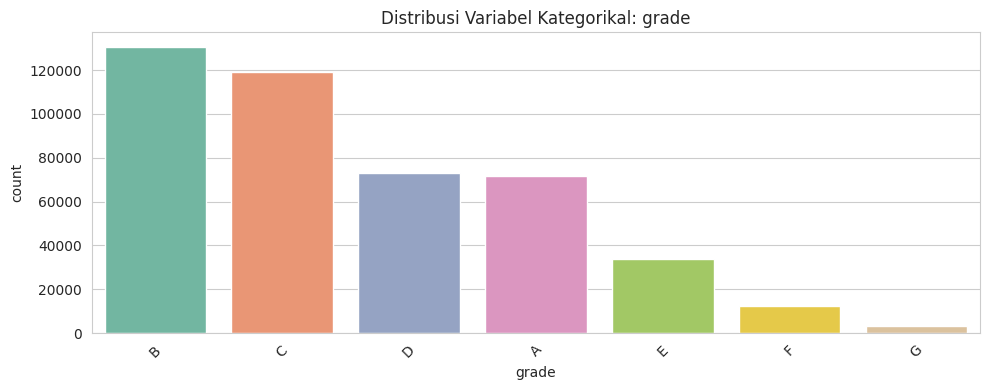

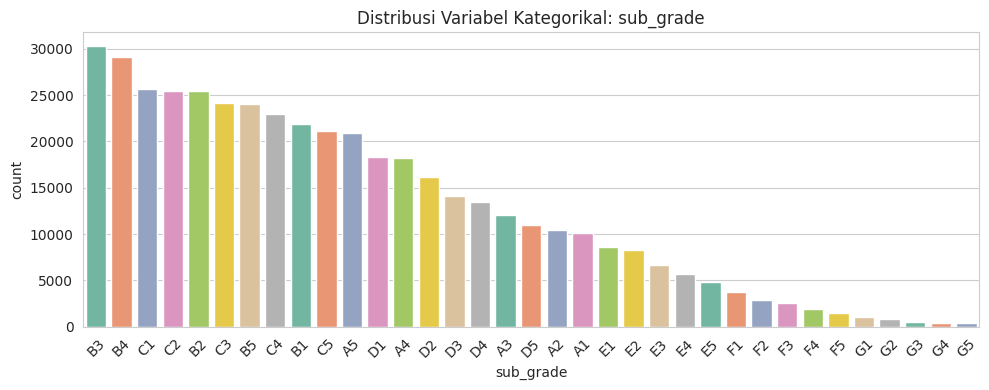

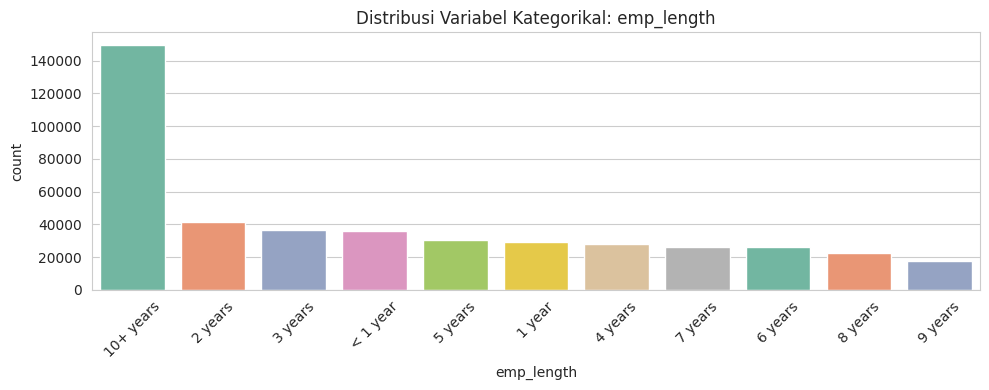

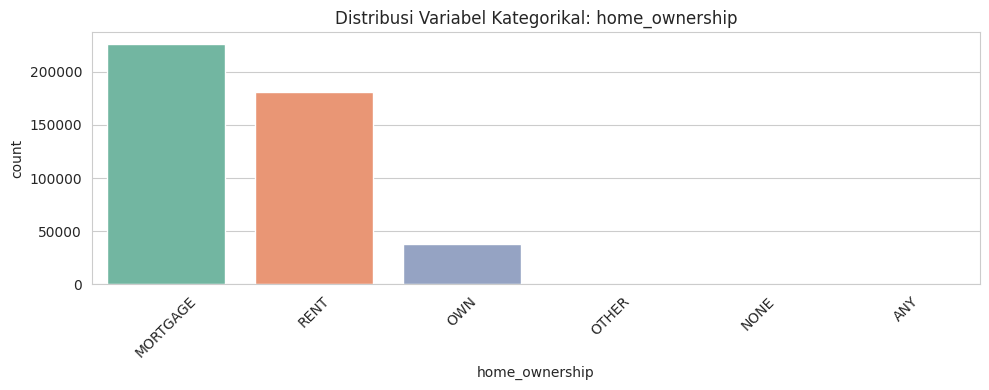

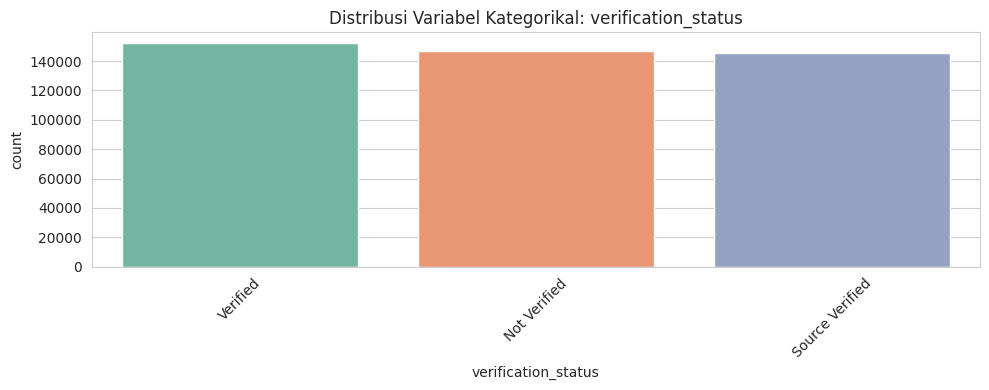

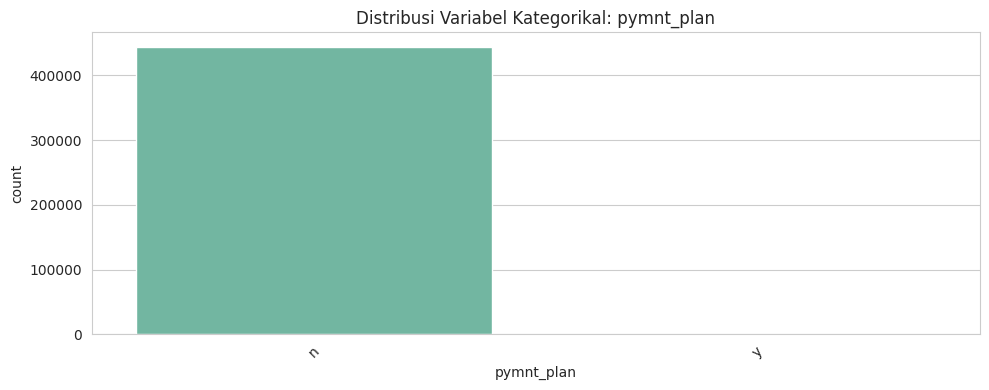

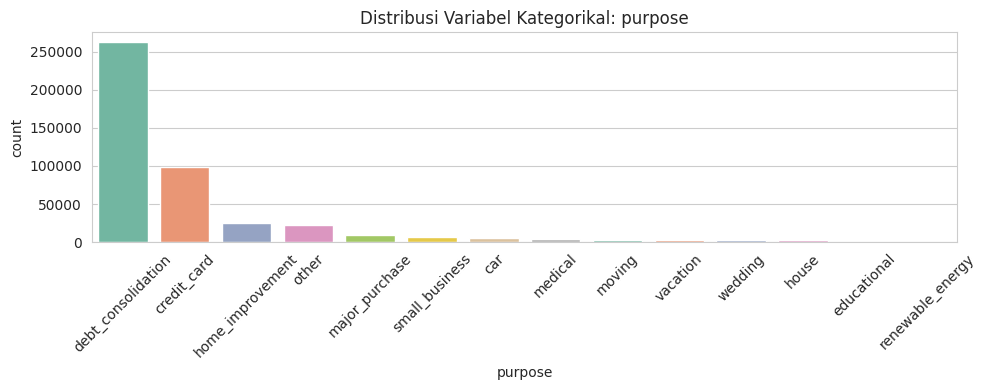

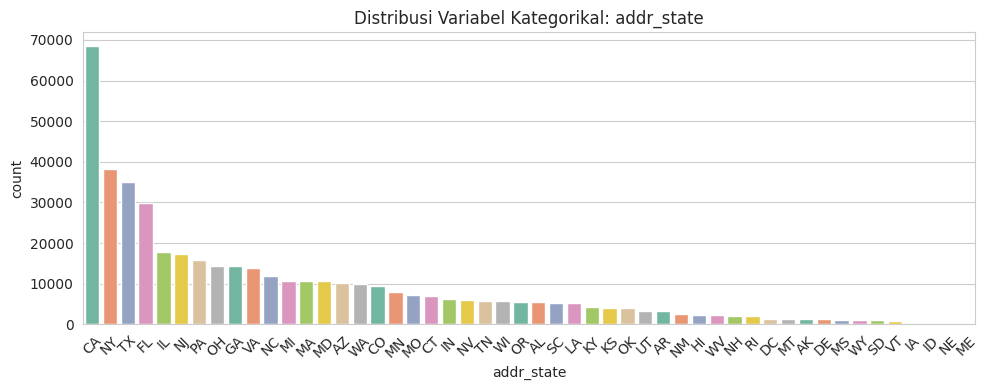

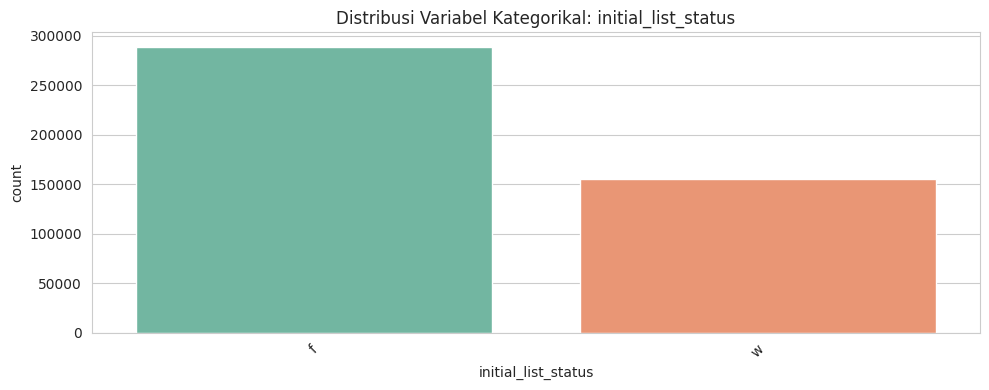

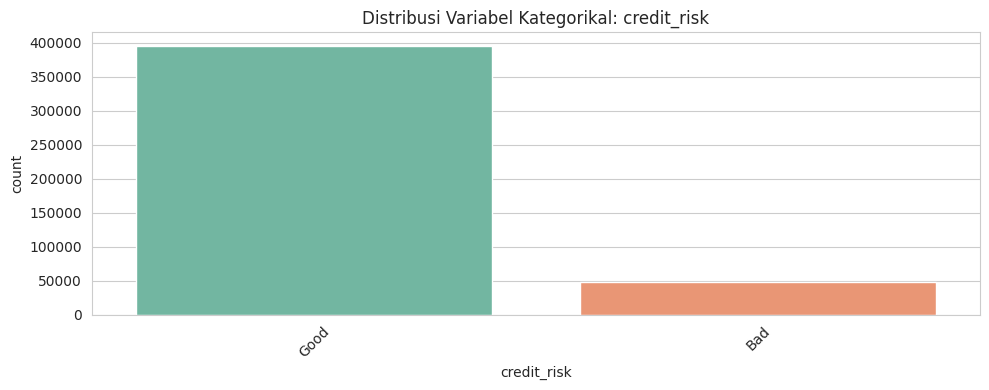

In [26]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Distribusi Variabel Kategorikal: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

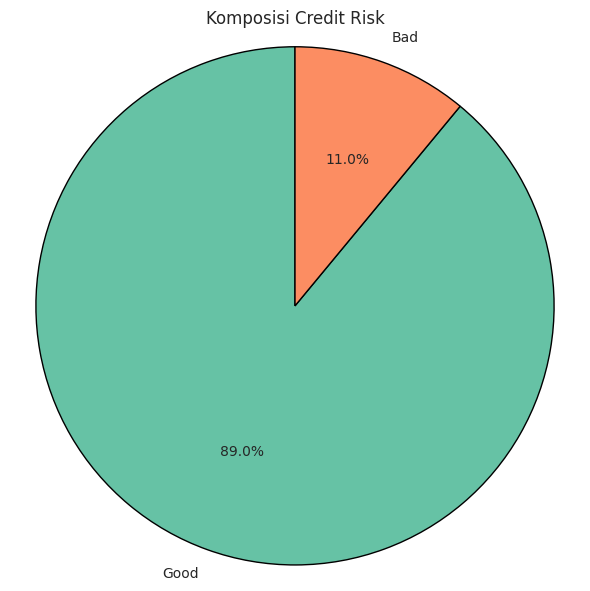

In [27]:
# Hitung jumlah masing-masing kategori credit_risk
credit_risk_counts = df['credit_risk'].value_counts()

# Ambil warna dari palette 'Set2'
colors = sns.color_palette('Set2', n_colors=len(credit_risk_counts))

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(
    credit_risk_counts,
    labels=credit_risk_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Komposisi Credit Risk')
plt.axis('equal')
plt.tight_layout()
plt.show()

Terlihat dari visualisasi data di atas bahwa adanya ketimpangan distribusi data good dan bad, data credit risk yang good lebih banyak dari yang bad. Maka perlu dilakukan handling imbalance agar kualitas model terjaga

## Distribusi Variabel Numerik

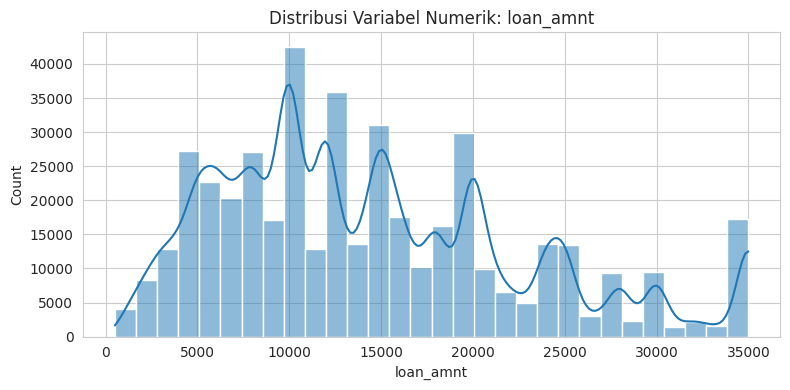

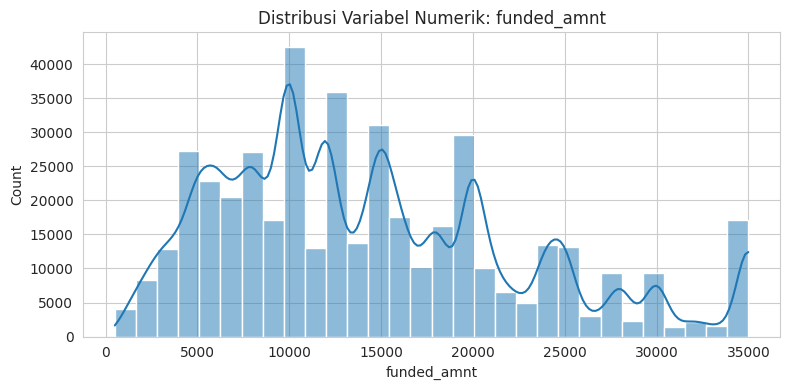

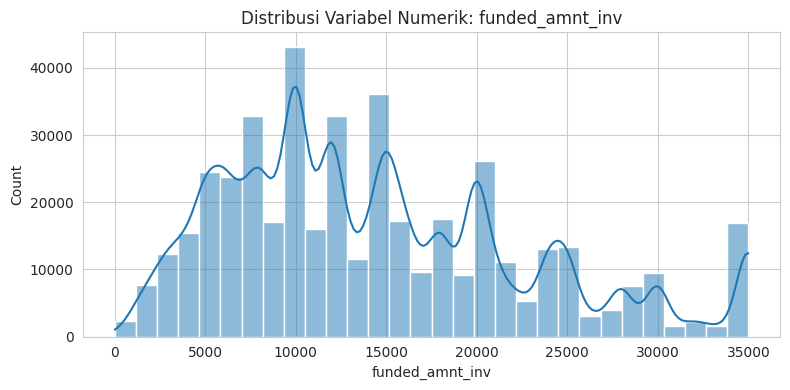

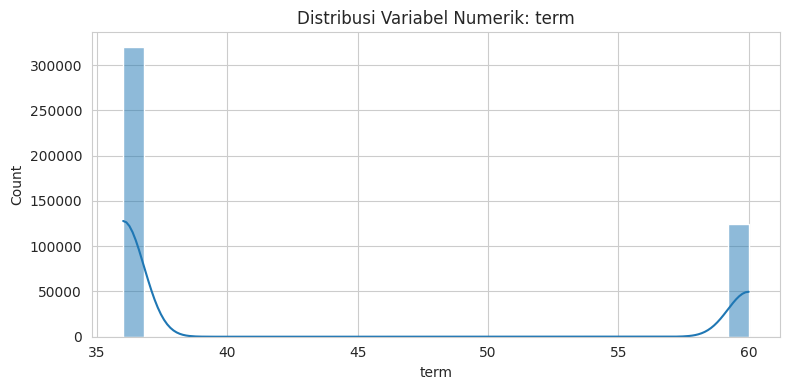

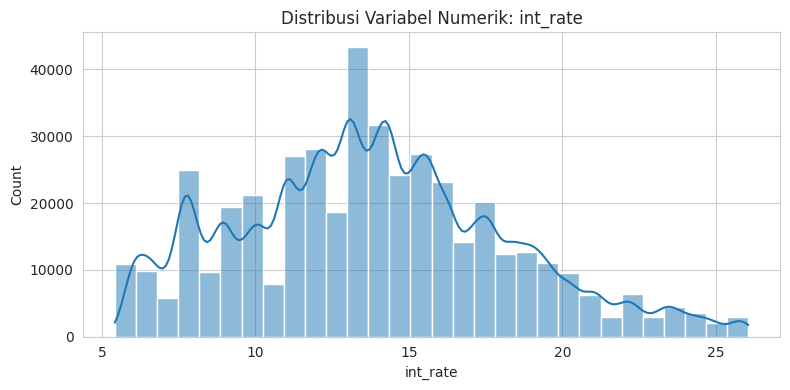

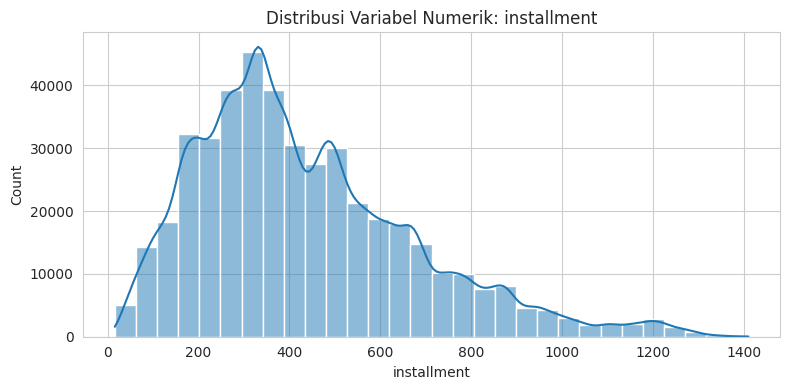

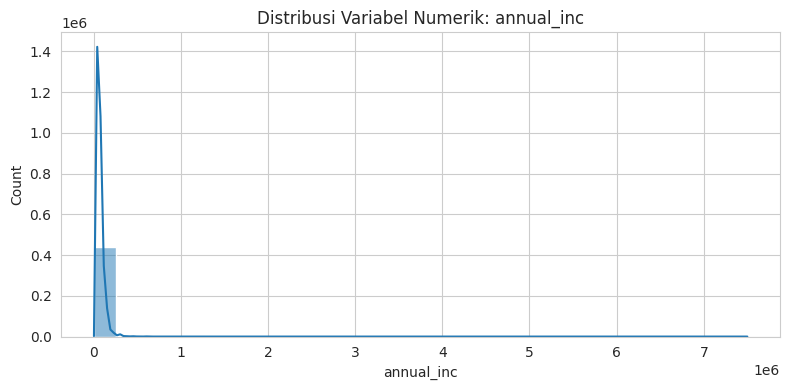

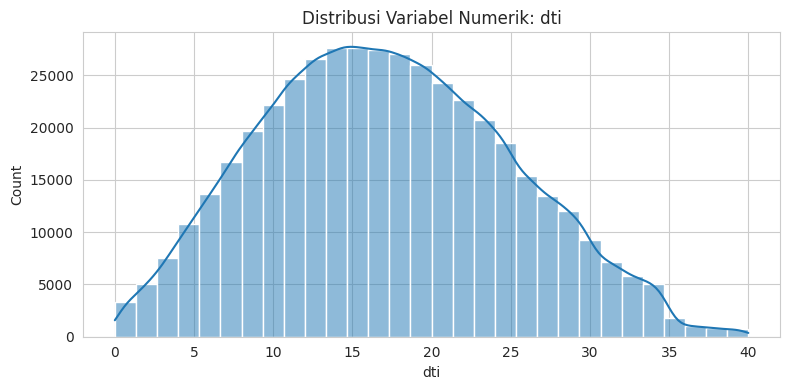

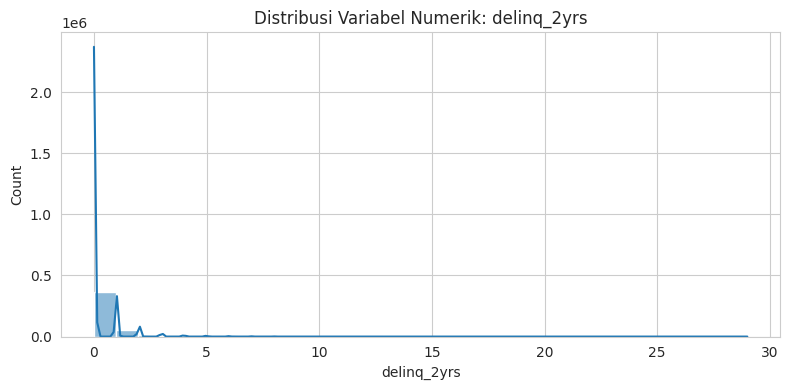

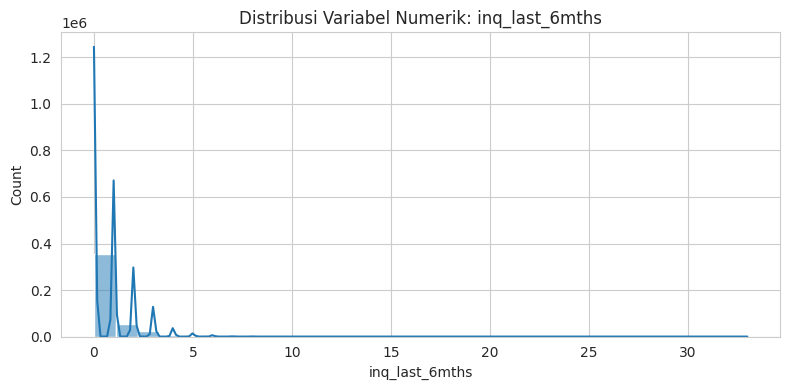

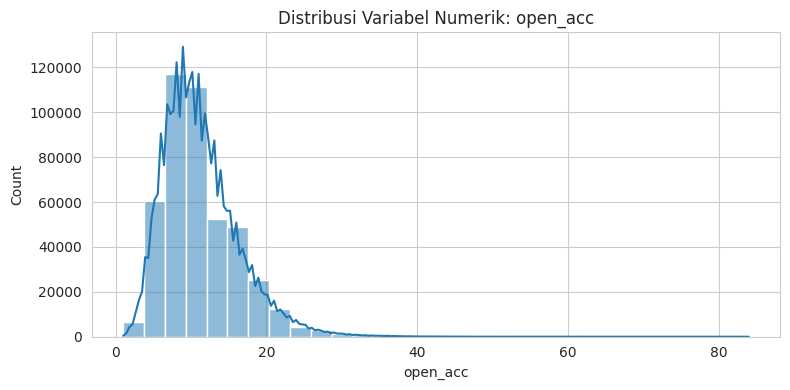

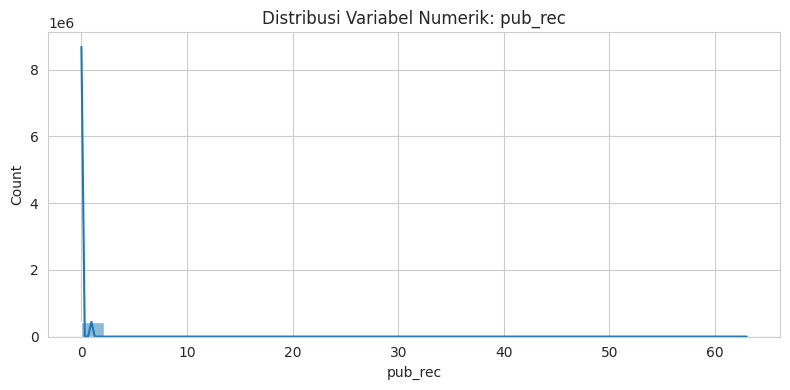

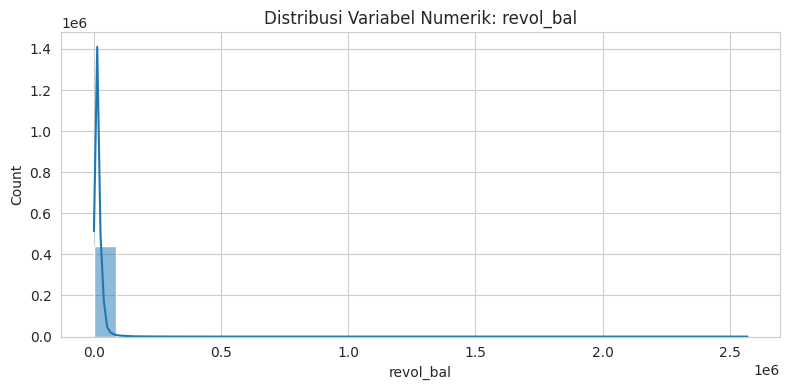

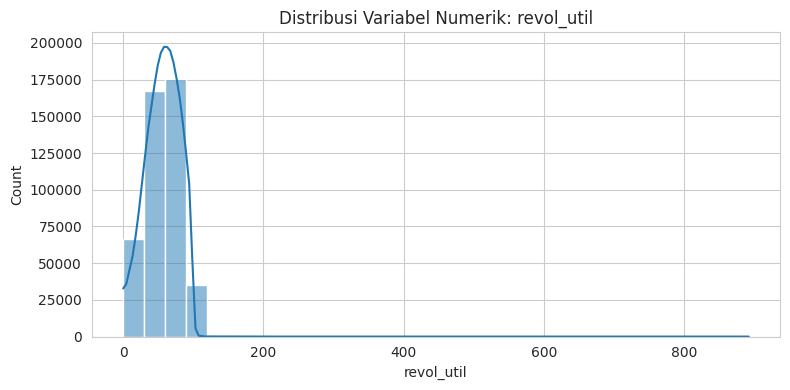

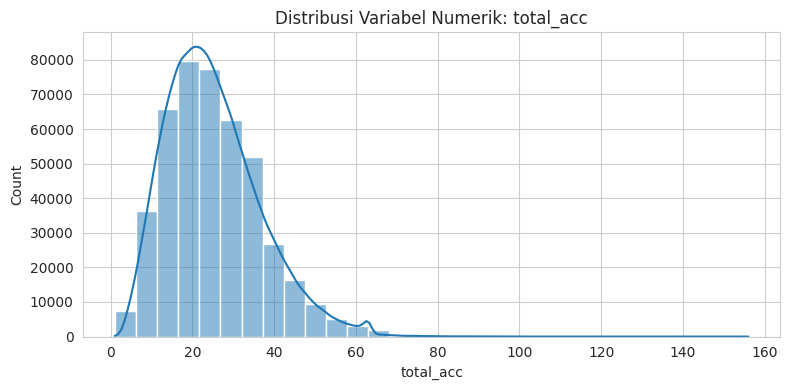

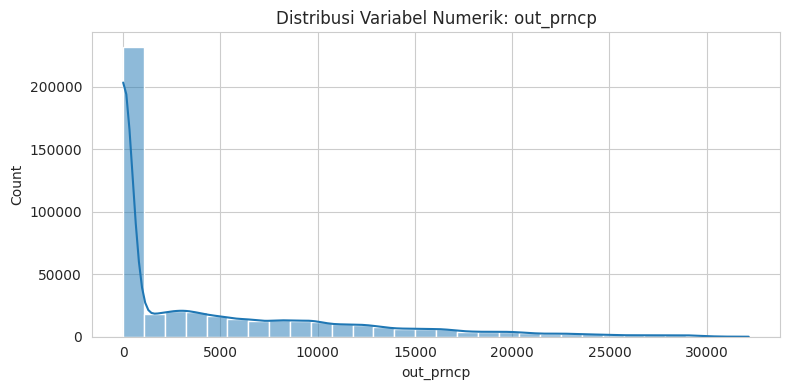

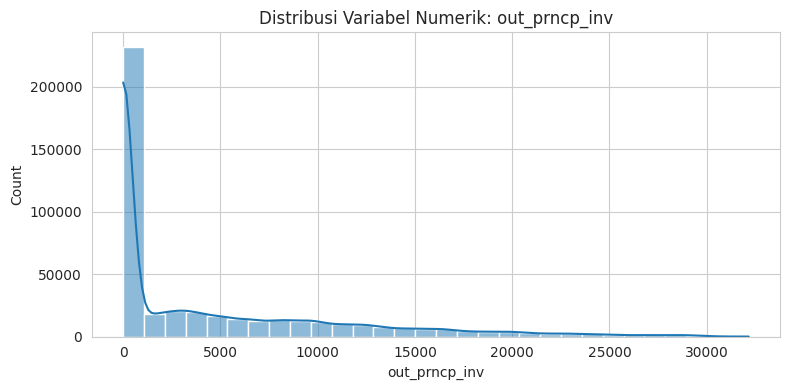

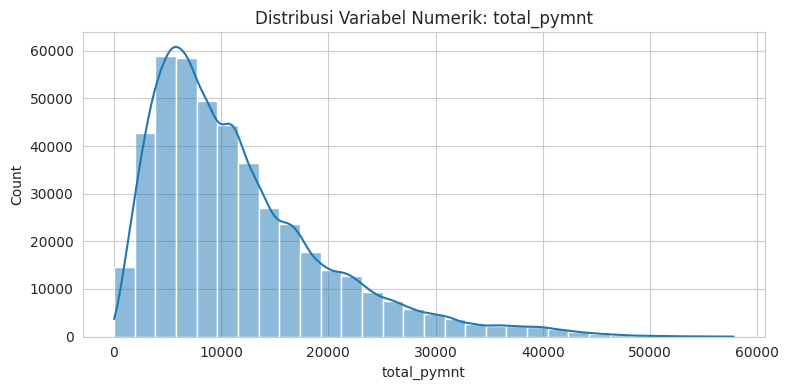

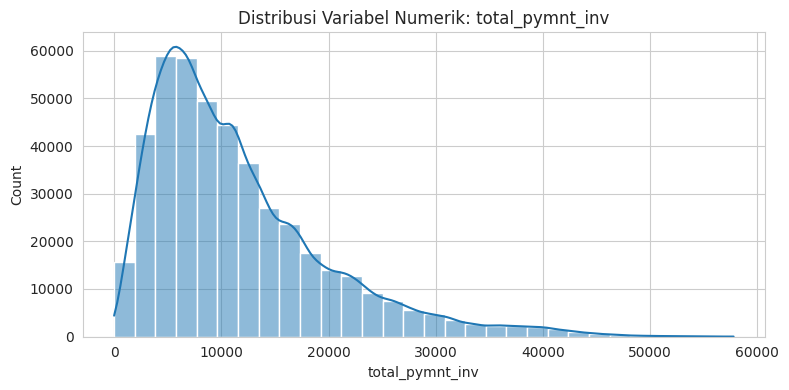

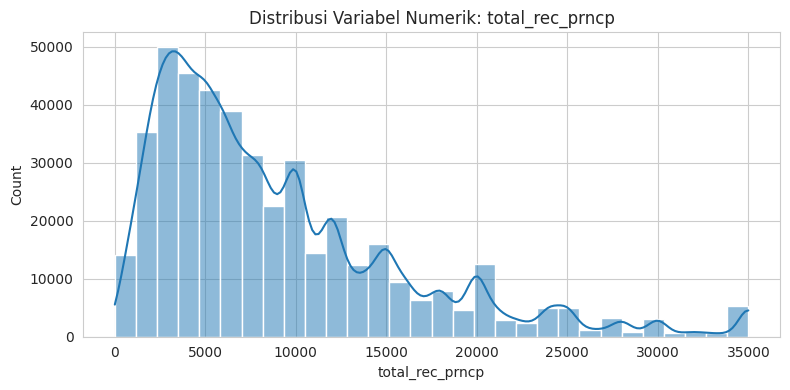

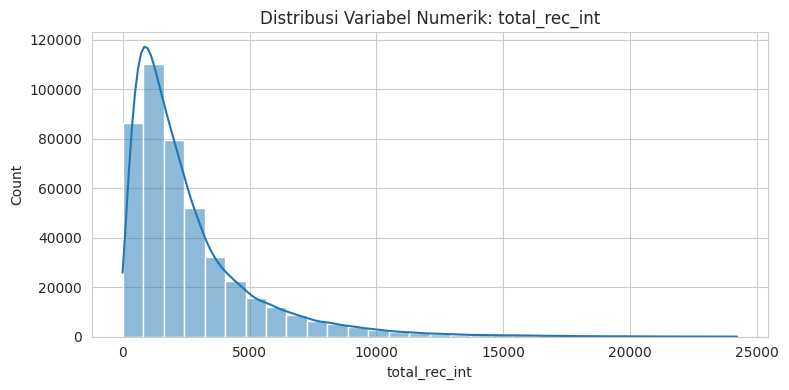

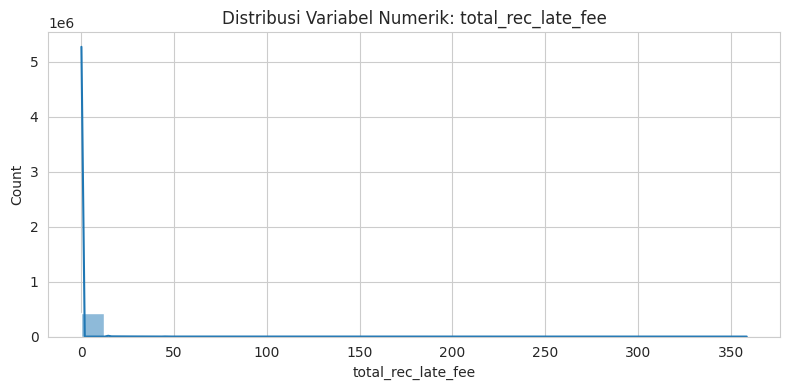

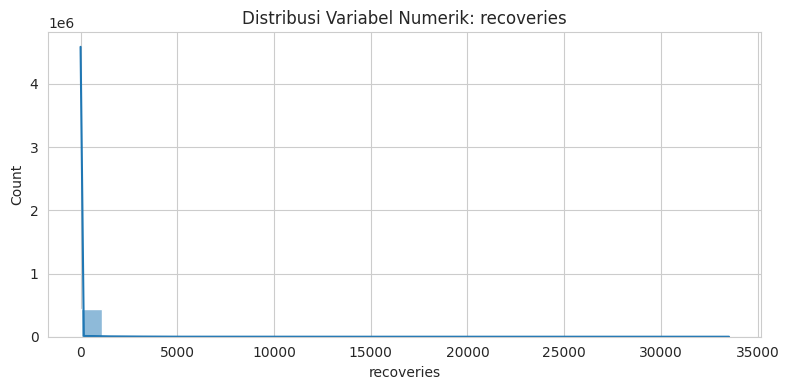

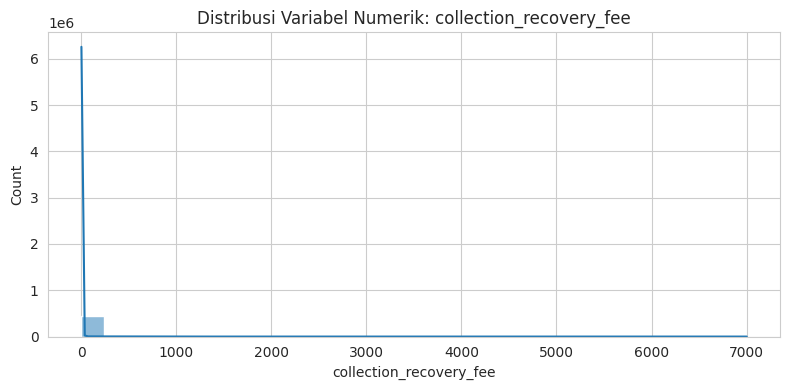

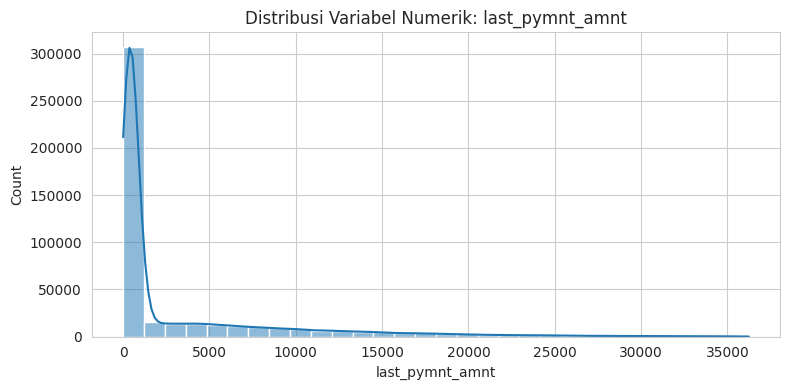

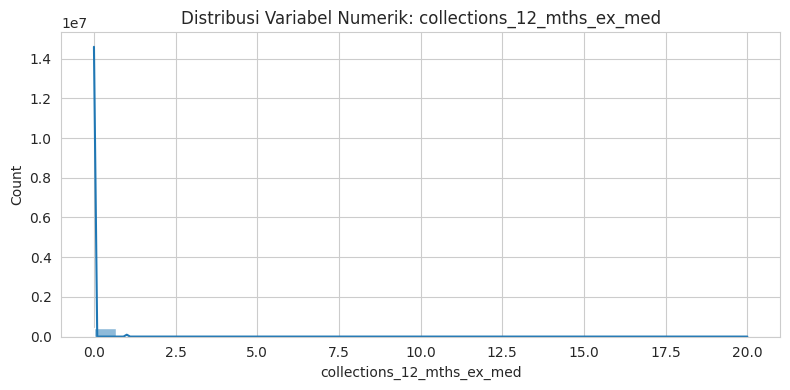

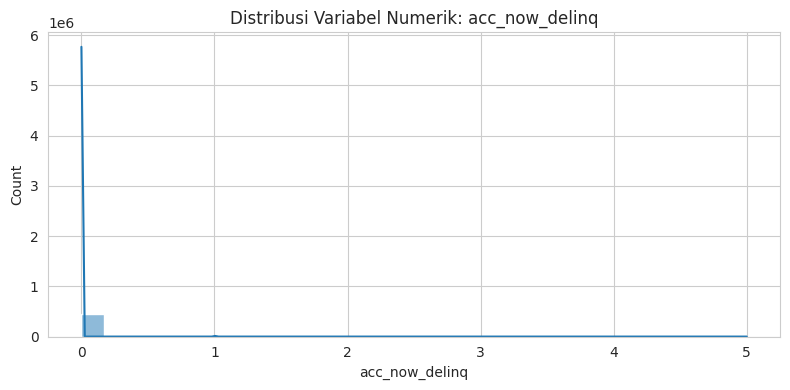

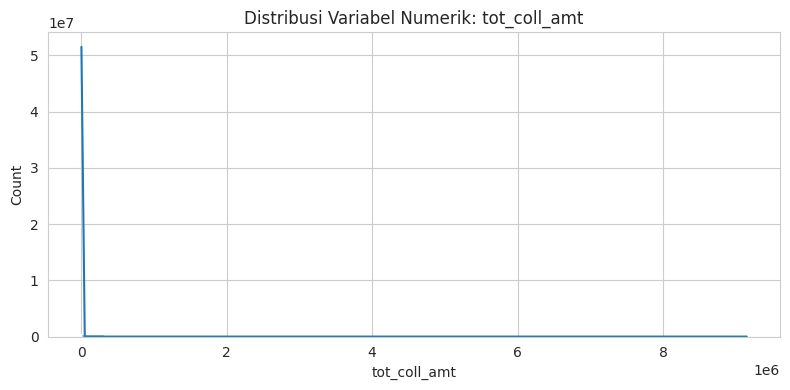

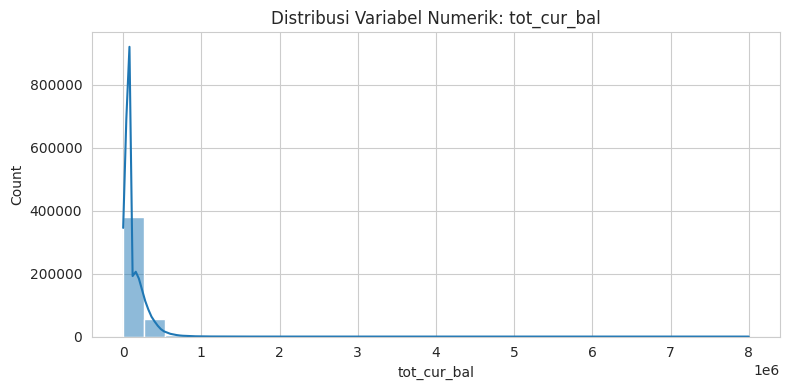

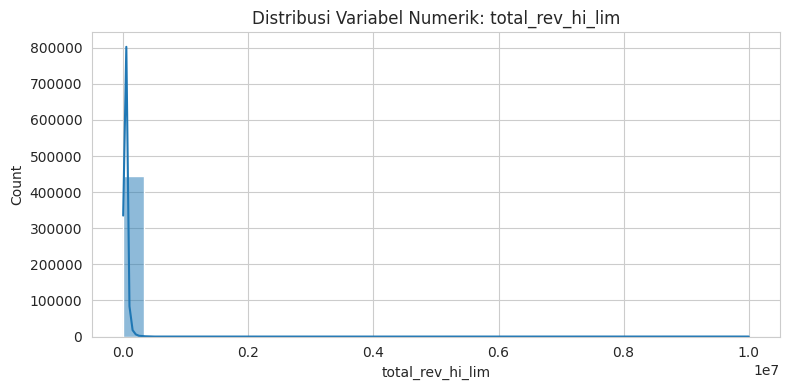

In [28]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi Variabel Numerik: {col}')
    plt.tight_layout()
    plt.show()

## Distribusi Jumlah Pinjaman (loan_amnt)

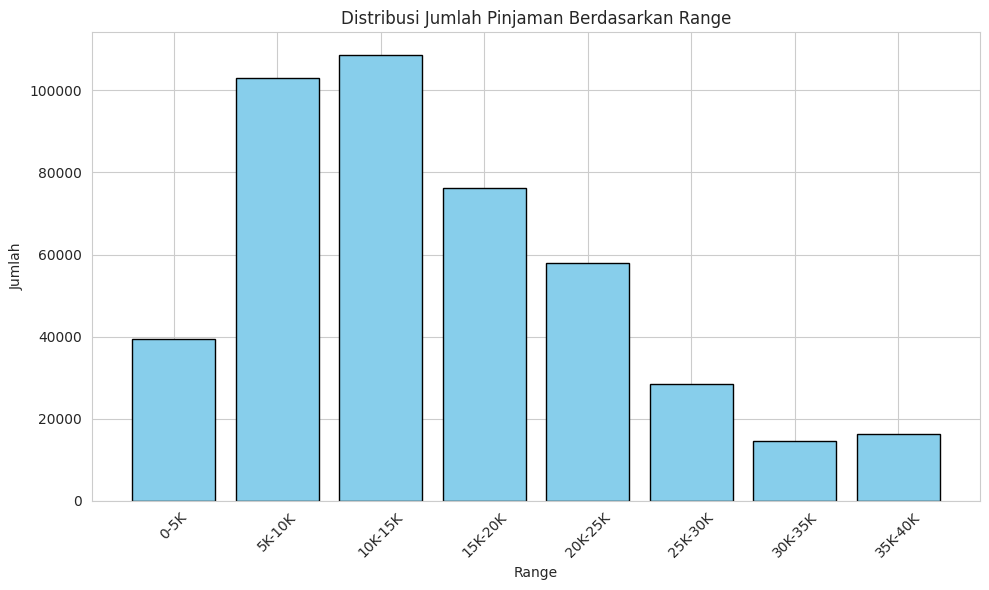

In [29]:
loan_amnt_temp = df['loan_amnt'].copy()
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
labels = ['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K', '25K-30K', '30K-35K', '35K-40K']
loan_range = pd.cut(loan_amnt_temp, bins=bins, labels=labels, right=False)
loan_distribution = loan_range.value_counts().sort_index().reset_index()
loan_distribution.columns = ['Range Jumlah Pinjaman ($)', 'Jumlah Data']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(loan_distribution['Range Jumlah Pinjaman ($)'], loan_distribution['Jumlah Data'], color='skyblue', edgecolor='black')
plt.title('Distribusi Jumlah Pinjaman Berdasarkan Range')
plt.xlabel('Range')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Korelasi Variabel Numerik

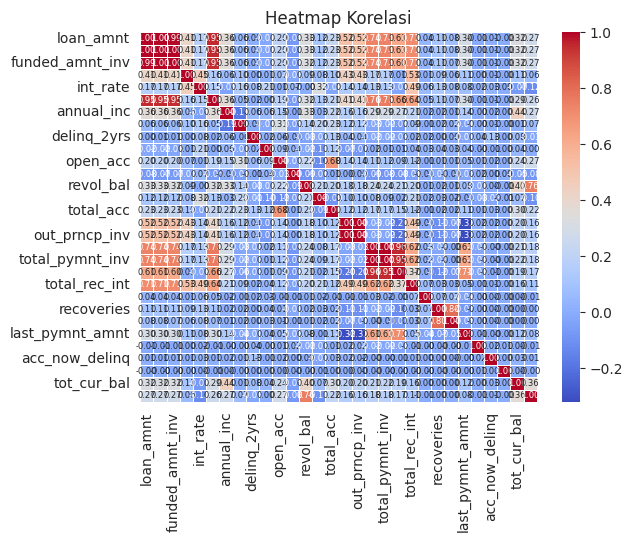

In [30]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, linewidths=0.5, fmt=".2f", annot_kws={'size': 6})
plt.title('Heatmap Korelasi')
plt.show()

 ## Perbandingan Credit Risk vs Grade / Sub-grade / Purpose

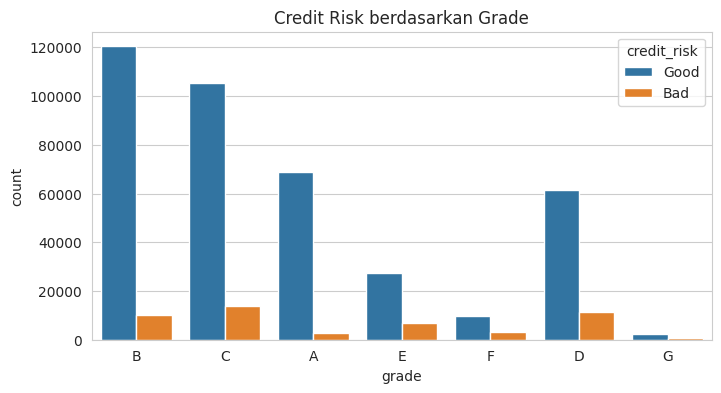

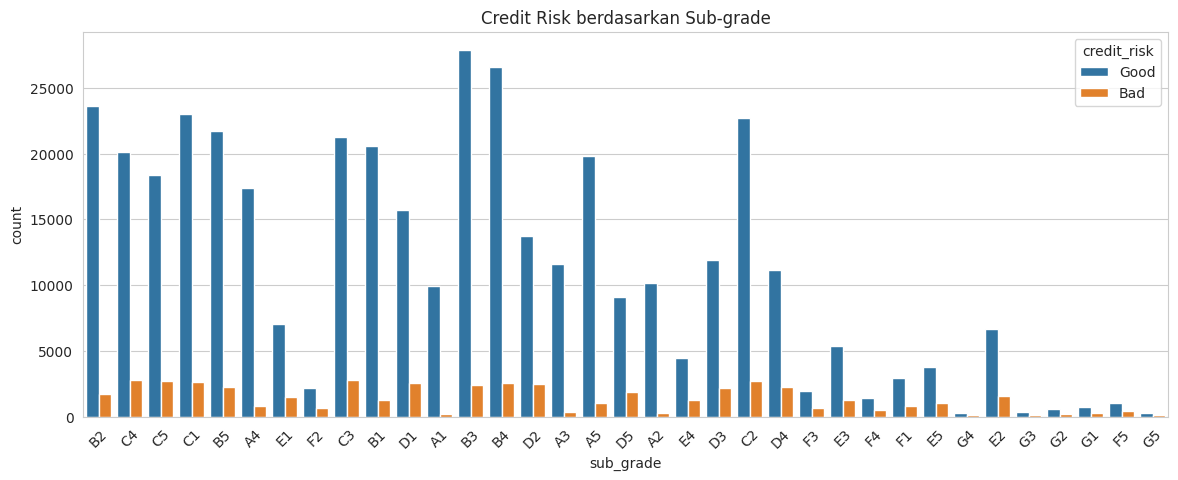

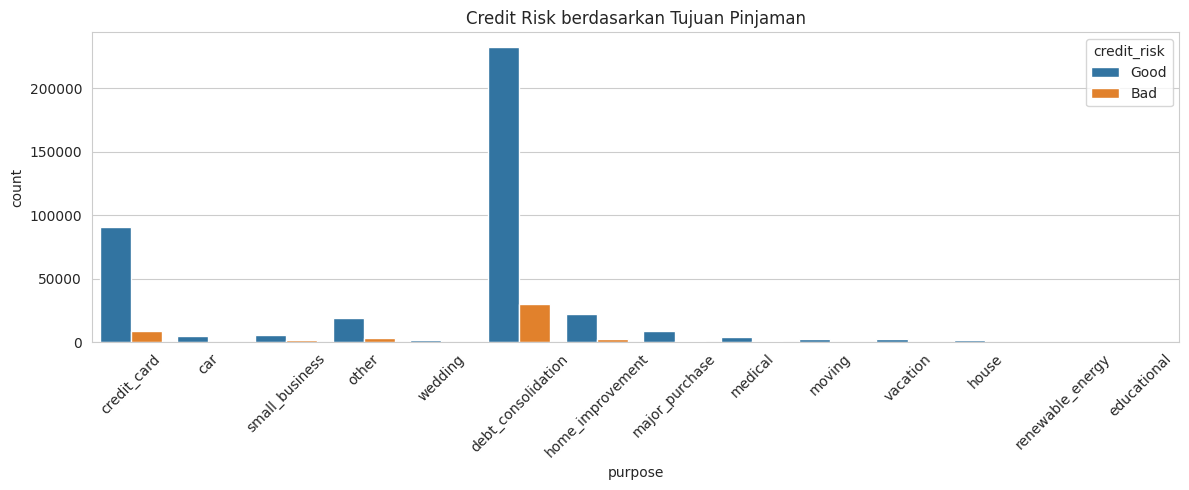

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='grade', hue='credit_risk')
plt.title('Credit Risk berdasarkan Grade')
plt.show()

plt.figure(figsize=(14,5))
sns.countplot(data=df, x='sub_grade', hue='credit_risk')
plt.title('Credit Risk berdasarkan Sub-grade')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='purpose', hue='credit_risk')
plt.title('Credit Risk berdasarkan Tujuan Pinjaman')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Boxplot - Credit Risk vs Variabel Numerik

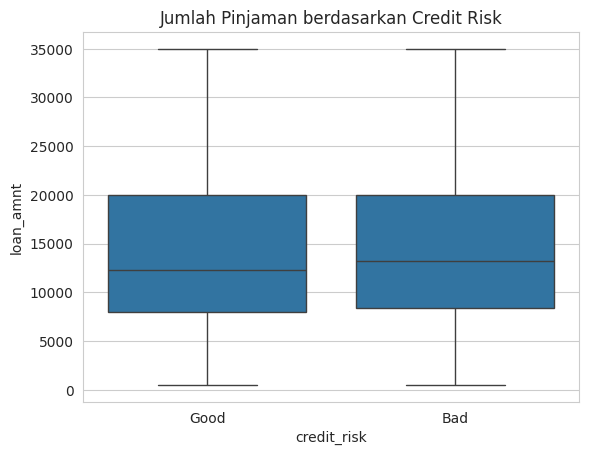

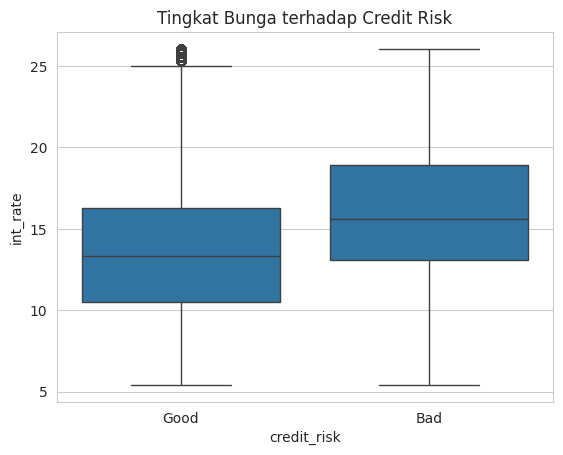

In [32]:
sns.boxplot(data=df, x='credit_risk', y='loan_amnt')
plt.title('Jumlah Pinjaman berdasarkan Credit Risk')
plt.show()

sns.boxplot(data=df, x='credit_risk', y='int_rate')
plt.title('Tingkat Bunga terhadap Credit Risk')
plt.show()

## Distribusi Variabel Numerik Berdasarkan Credit Risk

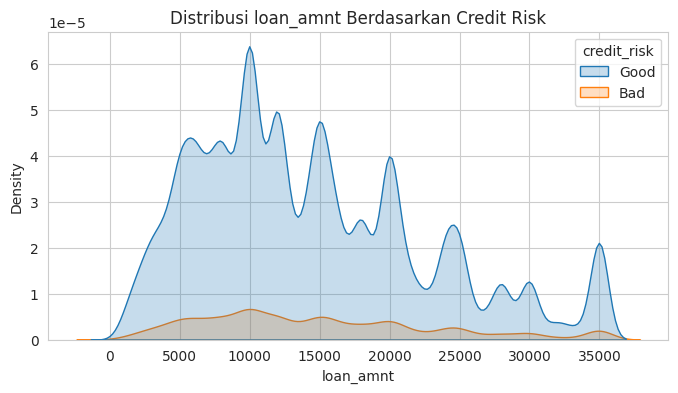

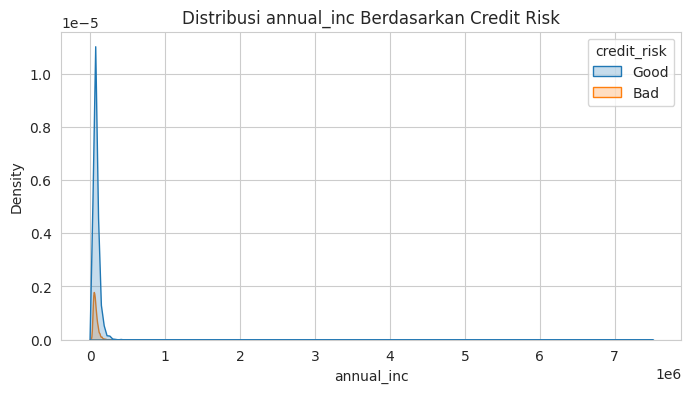

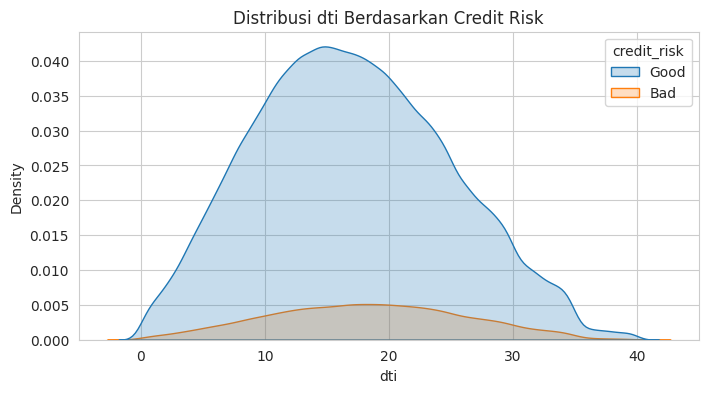

In [33]:
for col in ['loan_amnt', 'annual_inc', 'dti']:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=col, hue='credit_risk', fill=True)
    plt.title(f'Distribusi {col} Berdasarkan Credit Risk')
    plt.show()

## Tren Jumlah Pinjaman Berdasarkan Tahun (issue_d)

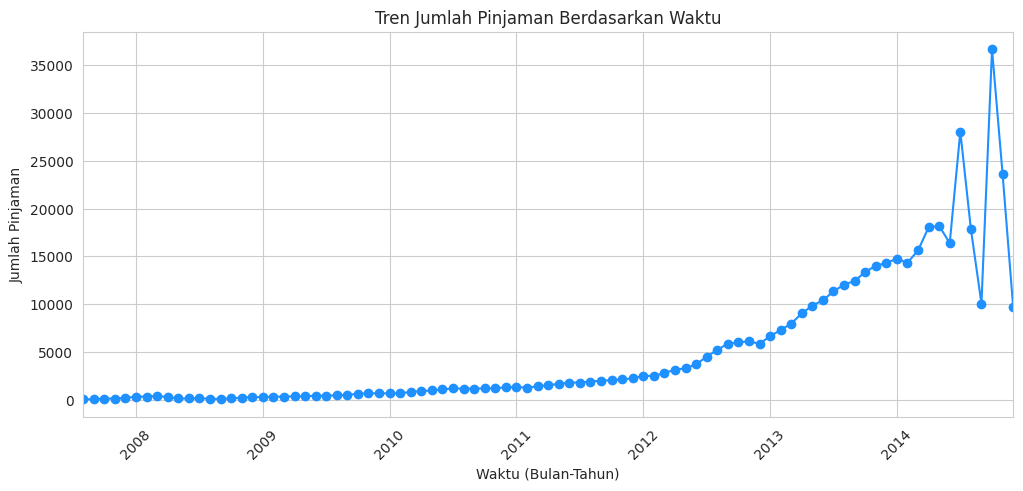

In [34]:
plt.figure(figsize=(12, 5))
df.groupby(df['issue_d'].dt.to_period("M")).size().plot(kind='line', marker='o', color='dodgerblue')
plt.title('Tren Jumlah Pinjaman Berdasarkan Waktu')
plt.xlabel('Waktu (Bulan-Tahun)')
plt.ylabel('Jumlah Pinjaman')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Hitung jumlah pinjaman per bulan (berdasarkan issue_d)
loan_trend_table = df.groupby(df['issue_d'].dt.to_period("M")).size().reset_index(name='jumlah_pinjaman')

# Ubah format period menjadi datetime (optional, agar lebih rapi)
loan_trend_table['issue_d'] = loan_trend_table['issue_d'].astype(str)

# Tampilkan tabel tren jumlah pinjaman per bulan
print(loan_trend_table)

    issue_d  jumlah_pinjaman
0   2007-08               21
1   2007-09               50
2   2007-10              103
3   2007-11              112
4   2007-12              171
5   2008-01              305
6   2008-02              305
7   2008-03              397
8   2008-04              257
9   2008-05              115
10  2008-06              123
11  2008-07              139
12  2008-08               99
13  2008-09               57
14  2008-10              122
15  2008-11              208
16  2008-12              252
17  2009-01              266
18  2009-02              301
19  2009-03              323
20  2009-04              330
21  2009-05              357
22  2009-06              403
23  2009-07              409
24  2009-08              446
25  2009-09              505
26  2009-10              601
27  2009-11              654
28  2009-12              655
29  2010-01              650
30  2010-02              653
31  2010-03              805
32  2010-04              888
33  2010-05   

# Data Preparation (Tahap 2)

## 5-Feature Engineering

### Multicollinearity Reduction

Dilakukan drop kolom yang memiliki relasi sangat tinggi dengan kolom lainnya (relasi >= 0.8).

Dipilih salah satu kolom yang representatif dalam pasangan kolom yang berelasi tersebut. Contoh: loan_amnt, funded_amnt, dan funded_amnt di drop → hanya loan_amnt yang disimpan.

In [36]:
# Hitung korelasi antar kolom numerik
cor_matrix = df.corr(numeric_only=True).abs()

# Temukan pasangan kolom dengan korelasi >= 0.8 (tanpa membatasi upper/lower triangle)
high_corr_pairs = []
for i in range(len(cor_matrix.columns)):
    for j in range(i + 1, len(cor_matrix.columns)):
        col1 = cor_matrix.columns[i]
        col2 = cor_matrix.columns[j]
        corr_val = cor_matrix.iloc[i, j]
        if corr_val >= 0.8:
            high_corr_pairs.append((col1, col2, corr_val))

# 4. Tampilkan pasangan dengan korelasi tinggi
print("Kolom-kolom dengan korelasi >= 0.8:")
for col1, col2, val in high_corr_pairs:
    print(f"{col1} vs {col2} | Korelasi: {val:.2f}")

# 5. Tentukan kolom yang akan di-drop (misal drop col2 dari tiap pasangan)
columns_to_drop = set()
for col1, col2, _ in high_corr_pairs:
    if col2 not in columns_to_drop:
        columns_to_drop.add(col2)

print("\nKolom yang akan di-drop:")
print(columns_to_drop)

Kolom-kolom dengan korelasi >= 0.8:
loan_amnt vs funded_amnt | Korelasi: 1.00
loan_amnt vs funded_amnt_inv | Korelasi: 0.99
loan_amnt vs installment | Korelasi: 0.95
funded_amnt vs funded_amnt_inv | Korelasi: 1.00
funded_amnt vs installment | Korelasi: 0.95
funded_amnt_inv vs installment | Korelasi: 0.95
out_prncp vs out_prncp_inv | Korelasi: 1.00
total_pymnt vs total_pymnt_inv | Korelasi: 1.00
total_pymnt vs total_rec_prncp | Korelasi: 0.96
total_pymnt_inv vs total_rec_prncp | Korelasi: 0.95

Kolom yang akan di-drop:
{'out_prncp_inv', 'installment', 'total_rec_prncp', 'funded_amnt_inv', 'total_pymnt_inv', 'funded_amnt'}


In [37]:
drop_columns = [
    'funded_amnt',
    'funded_amnt_inv',
    'installment',
    'out_prncp_inv',
    'total_pymnt_inv',
    'total_rec_prncp'
]
df = df.drop(columns=drop_columns)

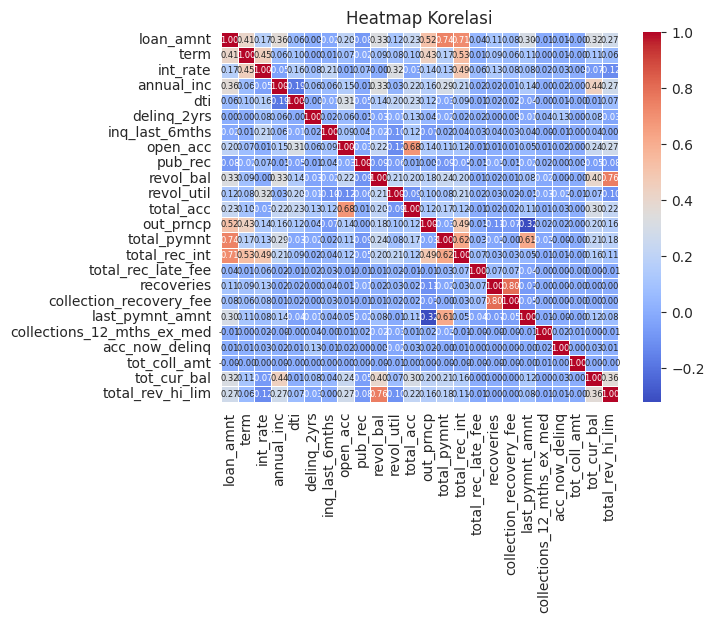

In [38]:
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, linewidths=0.5, fmt=".2f", annot_kws={'size': 6})
plt.title('Heatmap Korelasi')
plt.show()

In [39]:
df = df.drop('collection_recovery_fee', axis=1)

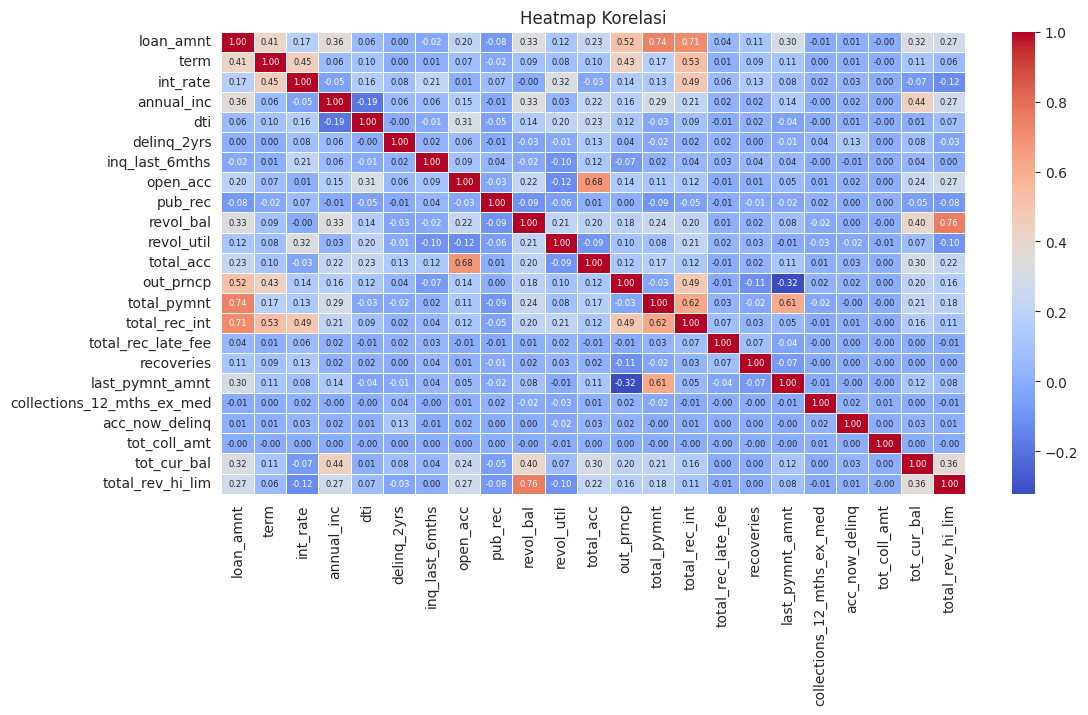

In [40]:
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True, linewidths=0.5, fmt=".2f", annot_kws={'size': 6})
plt.title('Heatmap Korelasi')
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444451 entries, 0 to 466284
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   444451 non-null  int64         
 1   term                        444451 non-null  float64       
 2   int_rate                    444451 non-null  float64       
 3   grade                       444451 non-null  object        
 4   sub_grade                   444451 non-null  object        
 5   emp_length                  444451 non-null  object        
 6   home_ownership              444451 non-null  object        
 7   annual_inc                  444451 non-null  float64       
 8   verification_status         444451 non-null  object        
 9   issue_d                     444451 non-null  datetime64[ns]
 10  pymnt_plan                  444451 non-null  object        
 11  purpose                     444451 non-null 

### Encoding



---

**Tujuan Encoding**

Encoding dilakukan untuk mengubah data kategorikal (non-numerik) menjadi bentuk numerik agar dapat diproses oleh algoritma machine learning, karena sebagian besar model hanya menerima input numerik.

---

**1. Ordinal Encoding (Untuk Kolom dengan Urutan Logis)**

Digunakan saat kategori memiliki urutan yang bermakna (misalnya dari yang "rendah" ke "tinggi").

✅ Kolom yang digunakan:

* `credit_risk`: memiliki makna *baik/buruk* → diubah menjadi `0 = Bad`, `1 = Good`.
* `grade`: tingkatan kredit (A > B > C > ... G).
* `sub_grade`: subdivisi dari grade, misal A1 < A2 < ... < G5.
* `emp_length`: lama bekerja, diurutkan dari `< 1 year` sampai `10+ years`.
* `verification_status`: tingkat verifikasi, diurutkan dari `Not Verified` → `Source Verified` → `Verified`.

Dengan encoding ini, model bisa menangkap pola berdasarkan urutan nilai.

---

**2. Label Encoding (Untuk Kolom Tanpa Urutan Logis)**

Digunakan saat kategori tidak memiliki makna urutan. Setiap kategori diberi label angka unik.

✅ Kolom yang digunakan:

* `home_ownership`: jenis kepemilikan rumah.
* `purpose`: tujuan peminjaman (misalnya: car, wedding, credit\_card).
* `addr_state`: wilayah atau negara bagian (contoh: CA, NY, TX).
* `initial_list_status`: status awal daftar pinjaman (contoh: f, w).
* `pymnt_plan`: status apakah ada rencana pembayaran (n/y).

Dengan label encoding, kolom tetap bisa dimasukkan ke model tanpa memberikan kesan adanya urutan.

---


#### 1. Ordinal Encoding

In [42]:
# Fitur dengan urutan yang jelas
ordinal_features = ["credit_risk", "grade", "sub_grade", "emp_length", "verification_status"]

# Mapping untuk ordinal encoding
ordinal_mapping = {
    "credit_risk": {"Bad": 0, "Good": 1},
    "grade": {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6},
    "sub_grade": {f"{g}{n}": i for i, (g, n) in enumerate([(g, n) for g in "ABCDEFG" for n in range(1, 6)])},
    "emp_length": {"< 1 year": 0, "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5,
                   "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9, "10+ years": 10},
    "verification_status": {"Not Verified": 0, "Source Verified": 1, "Verified": 2}
}

# Ubah kategori ke nilai numerik
for col, mapping in ordinal_mapping.items():
    df[col] = df[col].map(mapping)

#### 2. Label Encoding

In [43]:
label_features = ["home_ownership", "purpose", "addr_state", "initial_list_status", "pymnt_plan", ]

for feature in label_features:
  le = LabelEncoder()
  df[feature] = le.fit_transform(df[feature])

In [44]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_risk
0,5000,36.0,10.65,1,6,10,5,24000.0,2,2011-12-01,0,1,3,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648,83.7,9.0,0,0.0,5861.071414,861.07,0.00,0.00,2015-01-01,171.62,2016-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,1
1,2500,60.0,15.27,2,13,0,5,30000.0,1,2011-12-01,0,0,10,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687,9.4,4.0,0,0.0,1008.710000,435.17,0.00,117.08,2013-04-01,119.66,2016-02-01,2013-09-01,0.0,0.0,0.0,81539.0,22800.0,0
2,2400,36.0,15.96,2,14,10,5,12252.0,0,2011-12-01,0,11,14,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956,98.5,10.0,0,0.0,3003.653644,603.65,0.00,0.00,2014-06-01,649.91,2016-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,1
3,10000,36.0,13.49,2,10,10,5,49200.0,1,2011-12-01,0,9,4,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598,21.0,37.0,0,0.0,12226.302210,2209.33,16.97,0.00,2015-01-01,357.48,2016-02-01,2015-01-01,0.0,0.0,0.0,81539.0,22800.0,1
4,3000,60.0,12.69,1,9,1,5,80000.0,1,2011-12-01,0,9,36,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783,53.9,38.0,0,766.9,3242.170000,1009.07,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,0.0,0.0,81539.0,22800.0,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444451 entries, 0 to 466284
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   444451 non-null  int64         
 1   term                        444451 non-null  float64       
 2   int_rate                    444451 non-null  float64       
 3   grade                       444451 non-null  int64         
 4   sub_grade                   444451 non-null  int64         
 5   emp_length                  444451 non-null  int64         
 6   home_ownership              444451 non-null  int64         
 7   annual_inc                  444451 non-null  float64       
 8   verification_status         444451 non-null  int64         
 9   issue_d                     444451 non-null  datetime64[ns]
 10  pymnt_plan                  444451 non-null  int64         
 11  purpose                     444451 non-null 

Akan dilakukan penghapusan dengan tipe datetime karena tidak relevan lagi untuk model

In [46]:
df_original = df.copy()
df = df.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], axis=1)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444451 entries, 0 to 466284
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   444451 non-null  int64  
 1   term                        444451 non-null  float64
 2   int_rate                    444451 non-null  float64
 3   grade                       444451 non-null  int64  
 4   sub_grade                   444451 non-null  int64  
 5   emp_length                  444451 non-null  int64  
 6   home_ownership              444451 non-null  int64  
 7   annual_inc                  444451 non-null  float64
 8   verification_status         444451 non-null  int64  
 9   pymnt_plan                  444451 non-null  int64  
 10  purpose                     444451 non-null  int64  
 11  addr_state                  444451 non-null  int64  
 12  dti                         444451 non-null  float64
 13  delinq_2yrs        

## 6-Train Test Split

Akan dilakukan splitting dataset latih dan uji dengan besaran 80 : 20

In [48]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=["credit_risk"])
y = df["credit_risk"]

In [49]:
# Membagi dataset menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan bentuk dataset setelah split
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (355560, 32) (355560,)
Test set: (88891, 32) (88891,)


## 7-Handling Imbalance Data

Penanganan ketidakseimbangan data dilakukan menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan jumlah antara kelas target dalam data latih.

Penting untuk dicatat bahwa SMOTE (atau teknik oversampling/undersampling lainnya) hanya diterapkan pada data pelatihan (X_train, y_train). Sementara itu, data pengujian (X_test, y_test) tetap dibiarkan dalam kondisi aslinya (tidak seimbang) agar dapat mencerminkan kondisi distribusi data yang sesungguhnya di dunia nyata.

In [50]:
# Menangani Imbalance Data di Data Latih dengan SMOTE (contoh oversampling)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Cek distribusi sebelum dan sesudah SMOTE
print("Distribusi y sebelum SMOTE:\n", y_train.value_counts())
print("Distribusi y setelah SMOTE:\n", y_train_balanced.value_counts())

Distribusi y sebelum SMOTE:
 credit_risk
1    316441
0     39119
Name: count, dtype: int64
Distribusi y setelah SMOTE:
 credit_risk
0    316441
1    316441
Name: count, dtype: int64


## 8-Standarization

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Data Modeling

In [52]:
!pip install xgboost


🤖 MODEL BUILDING & EVALUATION

🔥 Training Logistic Regression...
✅ Logistic Regression Results:
   Accuracy: 0.9657
   Precision: 0.9805
   Recall: 0.9810
   F1-Score: 0.9807
   ROC-AUC: 0.9638
   CV ROC-AUC: 0.9864 (±0.0078)

🔥 Training Decision Tree...
✅ Decision Tree Results:
   Accuracy: 0.9765
   Precision: 0.9789
   Recall: 0.9950
   F1-Score: 0.9869
   ROC-AUC: 0.9572
   CV ROC-AUC: 0.9867 (±0.0120)

🔥 Training Random Forest...
✅ Random Forest Results:
   Accuracy: 0.9778
   Precision: 0.9779
   Recall: 0.9976
   F1-Score: 0.9876
   ROC-AUC: 0.9699
   CV ROC-AUC: 0.9973 (±0.0051)

🔥 Training XGBoost...
✅ XGBoost Results:
   Accuracy: 0.9822
   Precision: 0.9814
   Recall: 0.9989
   F1-Score: 0.9901
   ROC-AUC: 0.9779
   CV ROC-AUC: 0.9954 (±0.0091)

📊 CONFUSION MATRICES


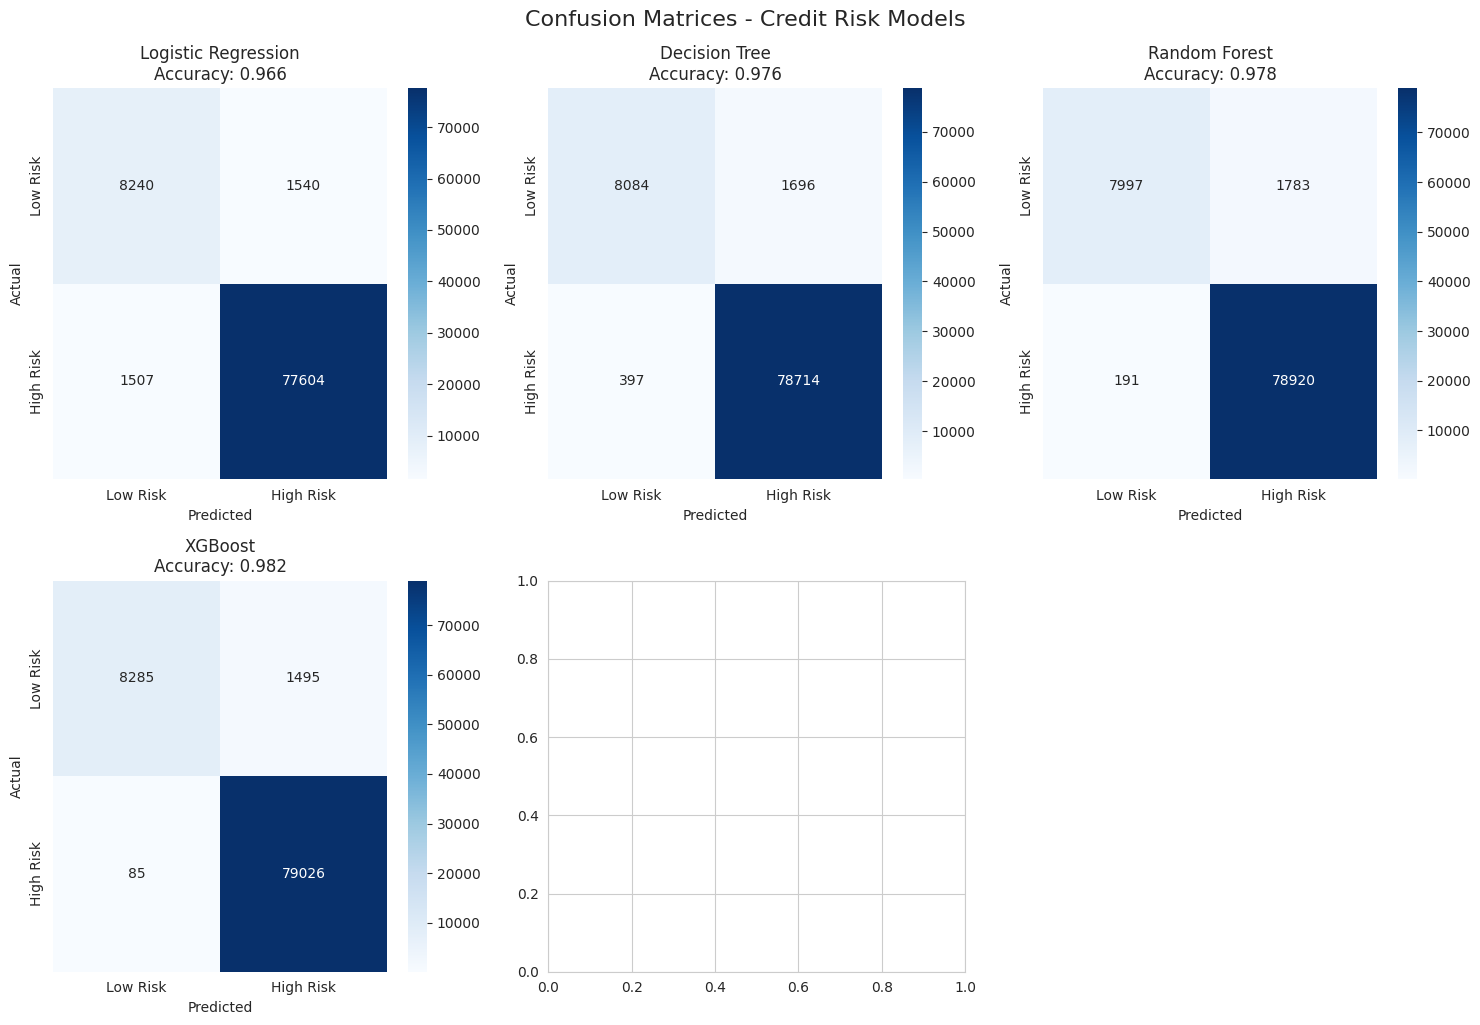


📈 ROC CURVES COMPARISON


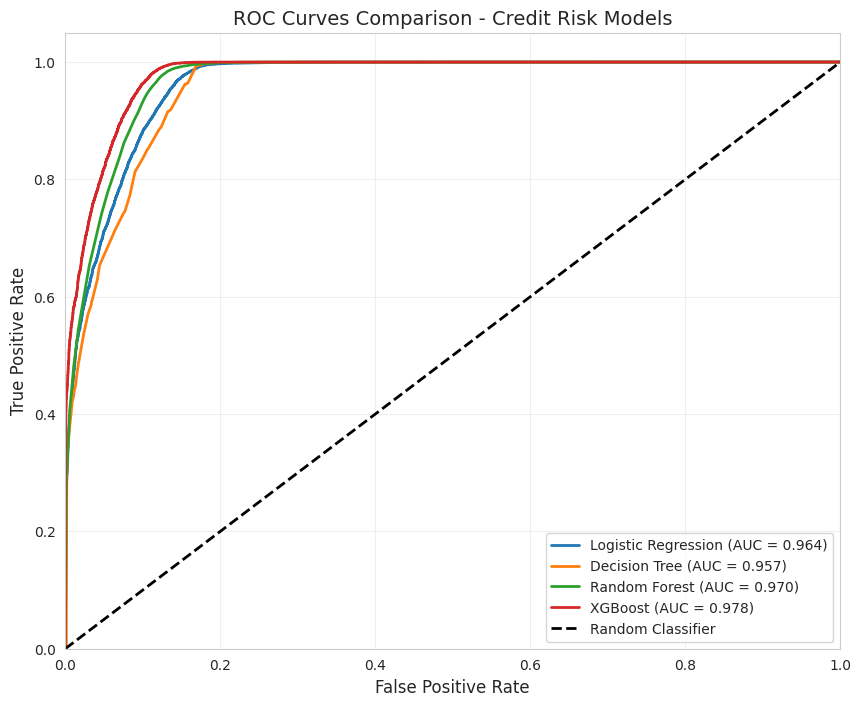


📊 METRICS COMPARISON


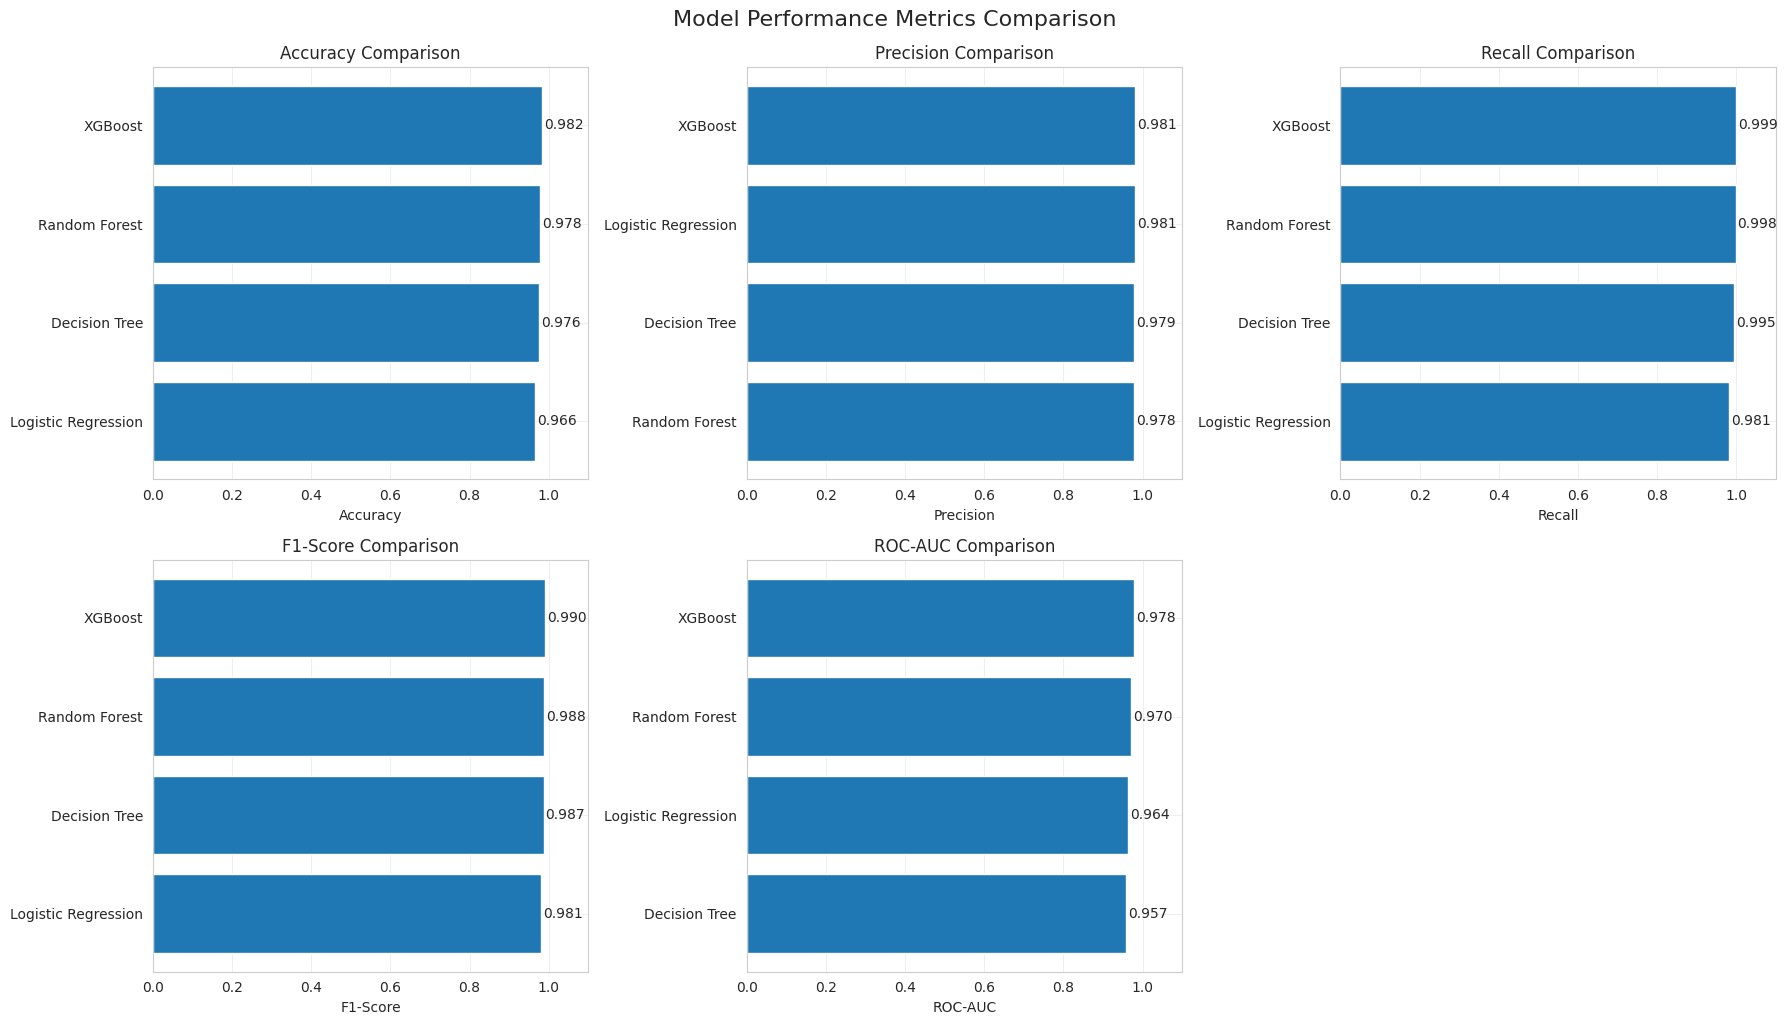


🏆 BEST MODEL IDENTIFICATION
🥇 BEST MODEL: XGBoost
🎯 ROC-AUC Score: 0.9779
📊 Accuracy: 0.9822
🎯 Precision: 0.9814
📈 Recall: 0.9989
⚖️ F1-Score: 0.9901
🔄 CV ROC-AUC: 0.9954 (±0.0091)

📋 DETAILED EVALUATION - XGBoost
Classification Report:
              precision    recall  f1-score   support

    Low Risk       0.99      0.85      0.91      9780
   High Risk       0.98      1.00      0.99     79111

    accuracy                           0.98     88891
   macro avg       0.99      0.92      0.95     88891
weighted avg       0.98      0.98      0.98     88891


Confusion Matrix Analysis:
True Negatives (Correctly predicted Low Risk): 8,285
False Positives (Low Risk predicted as High Risk): 1,495
False Negatives (High Risk predicted as Low Risk): 85
True Positives (Correctly predicted High Risk): 79,026

💼 BUSINESS INSIGHTS:
📊 Total applications evaluated: 88,891
🔴 Actual high-risk applications: 79,111
🟢 Actual low-risk applications: 9,780
🎯 High-risk detection rate: 99.9%
⚠️ False alarm 

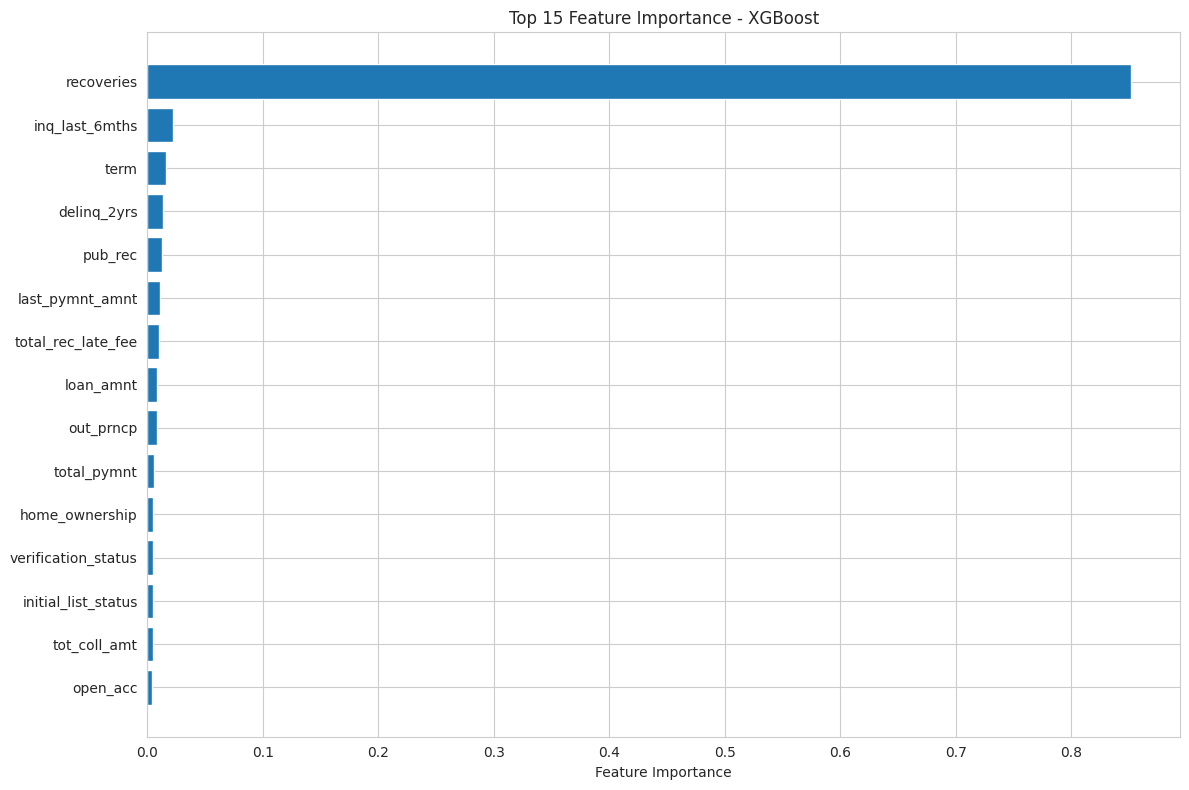


📊 SUMMARY TABLE - ALL MODELS PERFORMANCE
              Model Accuracy Precision Recall F1-Score ROC-AUC    CV ROC-AUC
            XGBoost   0.9822    0.9814 0.9989   0.9901  0.9779 0.9954±0.0091
      Random Forest   0.9778    0.9779 0.9976   0.9876  0.9699 0.9973±0.0051
Logistic Regression   0.9657    0.9805 0.9810   0.9807  0.9638 0.9864±0.0078
      Decision Tree   0.9765    0.9789 0.9950   0.9869  0.9572 0.9867±0.0120

💾 MODEL SAVING
✅ Best model (XGBoost) saved!
✅ Scaler saved!


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           roc_auc_score, precision_score, recall_score, f1_score, roc_curve)
from sklearn.pipeline import Pipeline


# =====================================
# MODEL BUILDING & EVALUATION
# =====================================

print("\n" + "="*80)
print("🤖 MODEL BUILDING & EVALUATION")
print("="*80)

# Definisikan 5 model
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Dictionary untuk menyimpan hasil
results = {}

# Training dan evaluasi setiap model
for name, model in models.items():
    print(f"\n🔥 Training {name}...")

    # Training model
    model.fit(X_train_scaled, y_train_balanced)

    # Prediksi
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Hitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train_balanced, cv=5, scoring='roc_auc')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Simpan hasil
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'model': model
    }

    # Print hasil
    print(f"✅ {name} Results:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall: {recall:.4f}")
    print(f"   F1-Score: {f1:.4f}")
    print(f"   ROC-AUC: {roc_auc:.4f}")
    print(f"   CV ROC-AUC: {cv_mean:.4f} (±{cv_std:.4f})")

# =====================================
# CONFUSION MATRICES VISUALIZATION
# =====================================

print("\n" + "="*60)
print("📊 CONFUSION MATRICES")
print("="*60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Low Risk', 'High Risk'],
               yticklabels=['Low Risk', 'High Risk'],
               ax=axes[idx])
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.3f}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Hide unused subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.suptitle('Confusion Matrices - Credit Risk Models', fontsize=16, y=1.02)
plt.show()

# =====================================
# ROC CURVES COMPARISON
# =====================================

print("\n" + "="*60)
print("📈 ROC CURVES COMPARISON")
print("="*60)

plt.figure(figsize=(10, 8))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, linewidth=2,
            label=f'{name} (AUC = {result["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison - Credit Risk Models', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# =====================================
# METRICS COMPARISON VISUALIZATION
# =====================================

print("\n" + "="*60)
print("📊 METRICS COMPARISON")
print("="*60)

# Prepare data untuk visualisasi
metrics_data = []
for name, result in results.items():
    metrics_data.append({
        'Model': name,
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1-Score': result['f1_score'],
        'ROC-AUC': result['roc_auc']
    })

df_metrics = pd.DataFrame(metrics_data)

# Create comparison plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for idx, metric in enumerate(metrics):
    df_sorted = df_metrics.sort_values(metric, ascending=True)
    bars = axes[idx].barh(df_sorted['Model'], df_sorted[metric])
    axes[idx].set_title(f'{metric} Comparison', fontsize=12)
    axes[idx].set_xlabel(metric)

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        axes[idx].text(width + 0.005, bar.get_y() + bar.get_height()/2,
                      f'{width:.3f}', ha='left', va='center')

    axes[idx].set_xlim(0, 1.1)
    axes[idx].grid(True, alpha=0.3)

axes[5].set_visible(False)
plt.tight_layout()
plt.suptitle('Model Performance Metrics Comparison', fontsize=16, y=1.02)
plt.show()

# =====================================
# BEST MODEL IDENTIFICATION
# =====================================

print("\n" + "="*80)
print("🏆 BEST MODEL IDENTIFICATION")
print("="*80)

# Identifikasi model terbaik berdasarkan ROC-AUC
best_model_name = max(results.keys(), key=lambda x: results[x]['roc_auc'])
best_result = results[best_model_name]
best_model = best_result['model']

print(f"🥇 BEST MODEL: {best_model_name}")
print(f"🎯 ROC-AUC Score: {best_result['roc_auc']:.4f}")
print(f"📊 Accuracy: {best_result['accuracy']:.4f}")
print(f"🎯 Precision: {best_result['precision']:.4f}")
print(f"📈 Recall: {best_result['recall']:.4f}")
print(f"⚖️ F1-Score: {best_result['f1_score']:.4f}")
print(f"🔄 CV ROC-AUC: {best_result['cv_mean']:.4f} (±{best_result['cv_std']:.4f})")

# =====================================
# DETAILED EVALUATION - BEST MODEL
# =====================================

print("\n" + "="*80)
print(f"📋 DETAILED EVALUATION - {best_model_name}")
print("="*80)

y_pred_best = best_result['y_pred']

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_best,
                          target_names=['Low Risk', 'High Risk']))

# Confusion matrix analysis
cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()

print(f"\nConfusion Matrix Analysis:")
print(f"True Negatives (Correctly predicted Low Risk): {tn:,}")
print(f"False Positives (Low Risk predicted as High Risk): {fp:,}")
print(f"False Negatives (High Risk predicted as Low Risk): {fn:,}")
print(f"True Positives (Correctly predicted High Risk): {tp:,}")

# Business insights
total_high_risk = tp + fn
total_low_risk = tn + fp
detection_rate = tp / total_high_risk if total_high_risk > 0 else 0
false_alarm_rate = fp / total_low_risk if total_low_risk > 0 else 0

print(f"\n💼 BUSINESS INSIGHTS:")
print(f"📊 Total applications evaluated: {len(y_test):,}")
print(f"🔴 Actual high-risk applications: {total_high_risk:,}")
print(f"🟢 Actual low-risk applications: {total_low_risk:,}")
print(f"🎯 High-risk detection rate: {detection_rate:.1%}")
print(f"⚠️ False alarm rate: {false_alarm_rate:.1%}")
print(f"💰 Overall accuracy: {best_result['accuracy']:.1%}")

# =====================================
# FEATURE IMPORTANCE (if applicable)
# =====================================

print("\n" + "="*80)
print(f"📈 FEATURE IMPORTANCE - {best_model_name}")
print("="*80)

# Feature names
feature_names = [
    'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
    'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
    'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
    'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
    'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
    'tot_cur_bal', 'total_rev_hi_lim'
]

if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("Top 10 Most Important Features:")
    print(feature_importance_df.head(10).to_string(index=False))

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"ℹ️ {best_model_name} doesn't provide feature importance scores")

# =====================================
# SUMMARY TABLE
# =====================================

print("\n" + "="*100)
print("📊 SUMMARY TABLE - ALL MODELS PERFORMANCE")
print("="*100)

summary_data = []
for name, result in results.items():
    summary_data.append({
        'Model': name,
        'Accuracy': f"{result['accuracy']:.4f}",
        'Precision': f"{result['precision']:.4f}",
        'Recall': f"{result['recall']:.4f}",
        'F1-Score': f"{result['f1_score']:.4f}",
        'ROC-AUC': f"{result['roc_auc']:.4f}",
        'CV ROC-AUC': f"{result['cv_mean']:.4f}±{result['cv_std']:.4f}"
    })

df_summary = pd.DataFrame(summary_data)
df_summary = df_summary.sort_values('ROC-AUC', ascending=False)
print(df_summary.to_string(index=False))

# =====================================
# MODEL SAVING
# =====================================

print("\n" + "="*60)
print("💾 MODEL SAVING")
print("="*60)

import joblib

# Save best model and scaler
joblib.dump(best_model, f'best_credit_risk_model_{best_model_name.lower().replace(" ", "_")}.pkl')
joblib.dump(scaler, 'credit_risk_scaler.pkl')

print(f"✅ Best model ({best_model_name}) saved!")
print(f"✅ Scaler saved!")